In [1]:
# Import library yang diperlukan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Mengatur style plot
plt.style.use('ggplot')
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 12

In [11]:
# IV.1.1 Eksplorasi Data - Exploratory Data Analysis (EDA)
print("=" * 80)
print("IV.1.1 EKSPLORASI DATA - EXPLORATORY DATA ANALYSIS (EDA)")
print("=" * 80)

# Membaca dataset
df = pd.read_csv('D://PoltekSSN/KULIAH/TA/ML RBA/ML/Proposal/TrialnError/rba-dataset.csv')

# Mengubah nilai "-" menjadi NaN
df.replace("-", np.nan, inplace=True)

# Melakukan random sampling 10% dari total baris
df_sampled = df.sample(frac=0.1, random_state=42)

# Menggunakan dataset hasil sampling untuk analisis
df = df_sampled

# A. Karakteristik Dataset
print("\nA. KARAKTERISTIK DATASET")
print("-" * 50)

# Deskripsi singkat dataset (jumlah fitur, observasi, tipe data)
print("1. Deskripsi Singkat Dataset:")
print(f"   - Jumlah observasi (baris): {df.shape[0]:,}")
print(f"   - Jumlah fitur (kolom): {df.shape[1]:,}")
print("\n   Tipe data setiap kolom:")
for col, dtype in df.dtypes.items():
    print(f"   - {col}: {dtype}")

# Tampilkan 5 baris pertama
print("\n2. Tampilan 5 Baris Pertama Data:")
display(df.head())

# Identifikasi fitur utama
print("\n3. Identifikasi Fitur Utama:")
for col in df.columns:
    print(f"   - {col}")

# Distribusi statistik dasar untuk kolom numerik
print("\n4. Distribusi Statistik Dasar (untuk fitur numerik):")
numeric_stats = df.describe().T
numeric_stats['range'] = numeric_stats['max'] - numeric_stats['min']
numeric_stats['unique'] = df.select_dtypes(include=[np.number]).nunique()
display(numeric_stats)

# Distribusi statistik dasar untuk kolom kategorikal
print("\n5. Distribusi Statistik Dasar (untuk fitur kategorikal):")
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    print(f"\n   {col}:")
    value_counts = df[col].value_counts().head(5)
    total_values = len(df[col])
    print("   Top 5 nilai:")
    for value, count in value_counts.items():
        print(f"     - {value}: {count:,} ({count/total_values*100:.2f}%)")
    print(f"   Total nilai unik: {df[col].nunique():,}")

IV.1.1 EKSPLORASI DATA - EXPLORATORY DATA ANALYSIS (EDA)

A. KARAKTERISTIK DATASET
--------------------------------------------------
1. Deskripsi Singkat Dataset:
   - Jumlah observasi (baris): 3,126,926
   - Jumlah fitur (kolom): 16

   Tipe data setiap kolom:
   - index: int64
   - Login Timestamp: object
   - User ID: int64
   - Round-Trip Time [ms]: float64
   - IP Address: object
   - Country: object
   - Region: object
   - City: object
   - ASN: int64
   - User Agent String: object
   - Browser Name and Version: object
   - OS Name and Version: object
   - Device Type: object
   - Login Successful: bool
   - Is Attack IP: bool
   - Is Account Takeover: bool

2. Tampilan 5 Baris Pertama Data:


,index,Login Timestamp,User ID,Round-Trip Time [ms],IP Address,Country,Region,City,ASN,User Agent String,Browser Name and Version,OS Name and Version,Device Type,Login Successful,Is Attack IP,Is Account Takeover
7642205,7642205,2020-05-18 09:13:46.460,-4324475583306591935,NaN,170.39.77.100,US,NaN,NaN,393398,Mozilla/5.0 (iPhone; CPU iPhone OS 14_2_1 lik...,Chrome Mobile 81.0.4044.1962,iOS 14.2.1,mobile,False,False,False
21205513,21205513,2020-11-19 11:18:39.884,-4460205060710285320,NaN,95.164.137.168,US,Wyoming,Cheyenne,54903,Mozilla/5.0 (iPhone; CPU iPhone OS 11_2_6 lik...,Chrome Mobile 81.0.4044.1939,iOS 11.2.6,mobile,False,False,False
7538232,7538232,2020-05-16 17:41:39.022,-4324475583306591935,NaN,10.0.181.205,AT,Lower Austria,Ludweis,262582,Mozilla/5.0 (Macintosh; Intel Mac OS X 11_6_3...,Chrome 84.0.4147.338.339,Mac OS X 11.6.3,desktop,False,False,False
6868289,6868289,2020-05-07 12:10:49.143,-2139020916950970496,NaN,84.210.17.29,NO,Viken,Sarpsborg,41164,Mozilla/5.0 (Linux; U; Android 13.0; i phone X...,Opera Mobile 52.1.2254,Android 13.0,mobile,True,False,False
11107426,11107426,2020-07-06 01:18:22.106,-1622064559923584159,NaN,213.229.115.38,GB,NaN,NaN,29550,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_14_6...,Chrome 67.0.3396,Mac OS X 10.14.6,desktop,True,False,False



3. Identifikasi Fitur Utama:
   - index
   - Login Timestamp
   - User ID
   - Round-Trip Time [ms]
   - IP Address
   - Country
   - Region
   - City
   - ASN
   - User Agent String
   - Browser Name and Version
   - OS Name and Version
   - Device Type
   - Login Successful
   - Is Attack IP
   - Is Account Takeover

4. Distribusi Statistik Dasar (untuk fitur numerik):


,count,mean,std,min,25%,50%,75%,max,range,unique
index,3126926.0,1.564372e+07,9.028471e+06,1.200000e+01,7.825588e+06,1.564800e+07,2.346283e+07,3.126926e+07,3.126925e+07,3126926
User ID,3126926.0,-1.925610e+18,4.512432e+18,-9.223351e+18,-4.324476e+18,-4.324476e+18,9.137411e+17,9.223351e+18,1.844670e+19,1159709
Round-Trip Time [ms],127673.0,6.701515e+02,1.354442e+03,9.000000e+00,4.710000e+02,5.380000e+02,6.780000e+02,2.234570e+05,2.234480e+05,3417
ASN,3126926.0,1.621031e+05,1.719180e+05,1.200000e+01,2.969500e+04,4.116400e+04,3.933980e+05,5.077270e+05,5.077150e+05,7113



5. Distribusi Statistik Dasar (untuk fitur kategorikal):

   Login Timestamp:
   Top 5 nilai:
     - 2020-12-16 14:24:40.583: 2 (0.00%)
     - 2020-12-10 15:58:39.921: 2 (0.00%)
     - 2020-12-25 16:26:13.544: 2 (0.00%)
     - 2020-05-27 07:33:43.887: 2 (0.00%)
     - 2020-10-06 15:45:26.262: 2 (0.00%)
   Total nilai unik: 3,126,921

   IP Address:
   Top 5 nilai:
     - 10.3.205.197: 44,607 (1.43%)
     - 23.137.225.33: 31,906 (1.02%)
     - 10.3.205.196: 25,826 (0.83%)
     - 10.3.205.195: 23,691 (0.76%)
     - 10.3.205.194: 17,876 (0.57%)
   Total nilai unik: 1,021,476

   Country:
   Top 5 nilai:
     - NO: 1,321,679 (42.27%)
     - US: 869,117 (27.79%)
     - RU: 169,495 (5.42%)
     - BR: 117,927 (3.77%)
     - DE: 89,817 (2.87%)
   Total nilai unik: 221

   Region:
   Top 5 nilai:
     - Oslo County: 231,440 (7.40%)
     - Viken: 198,836 (6.36%)
     - Rogaland: 171,815 (5.49%)
     - Innlandet: 83,228 (2.66%)
     - Vestfold og Telemark: 77,598 (2.48%)
   Total nilai unik: 1,9

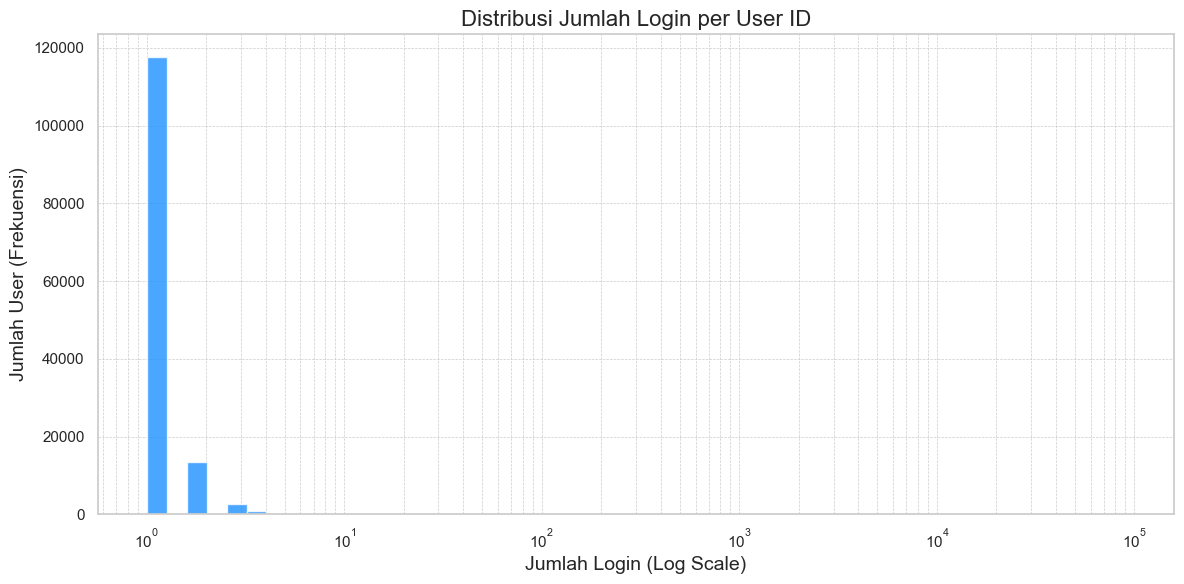

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Hitung jumlah login per User ID
login_counts = df['User ID'].value_counts()
login_counts = login_counts[login_counts > 0]  # hilangkan jika ada nol

# Buat bin logaritmik
bins = np.logspace(np.log10(login_counts.min()), np.log10(login_counts.max()), 50)

# Plot histogram
plt.figure(figsize=(12, 6))
plt.hist(login_counts, bins=bins, color='dodgerblue', alpha=0.8)
plt.xscale('log')
plt.title('Distribusi Jumlah Login per User ID', fontsize=16)
plt.xlabel('Jumlah Login (Log Scale)', fontsize=14)
plt.ylabel('Jumlah User (Frekuensi)', fontsize=14)
plt.grid(True, which="both", ls="--", linewidth=0.5)
plt.tight_layout()
plt.show()


In [10]:
# Hitung jumlah login per User ID
login_counts = df['User ID'].value_counts()

# Statistik dasar
total_user = len(login_counts)
min_login = login_counts.min()
max_login = login_counts.max()
mean_login = login_counts.mean()
median_login = login_counts.median()

# Distribusi khusus
login_once = (login_counts == 1).sum()
login_2_5 = ((login_counts >= 2) & (login_counts <= 5)).sum()
login_6_10 = ((login_counts >= 6) & (login_counts <= 10)).sum()
login_11_100 = ((login_counts > 10) & (login_counts <= 100)).sum()
login_over_100 = (login_counts > 100).sum()

# Cetak hasil
print(f"Total User ID           : {total_user:,}")
print(f"Jumlah Login Minimum    : {min_login}")
print(f"Jumlah Login Maksimum   : {max_login}")
print(f"Rata-rata Login/User    : {mean_login:.2f}")
print(f"Median Login/User       : {median_login}")

print("\nDistribusi Jumlah Login:")
print(f"- User login 1x         : {login_once:,} user")
print(f"- Login 2–5x            : {login_2_5:,} user")
print(f"- Login 6–10x           : {login_6_10:,} user")
print(f"- Login 11–100x         : {login_11_100:,} user")
print(f"- Login > 100x          : {login_over_100:,} user")


Total User ID           : 135,194
Jumlah Login Minimum    : 1
Jumlah Login Maksimum   : 89664
Rata-rata Login/User    : 1.85
Median Login/User       : 1.0

Distribusi Jumlah Login:
- User login 1x         : 117,567 user
- Login 2–5x            : 17,253 user
- Login 6–10x           : 315 user
- Login 11–100x         : 58 user
- Login > 100x          : 1 user



B. POTENSI MASALAH DATA
--------------------------------------------------
1. Data Duplikat: 0 baris (0.00% dari total data)


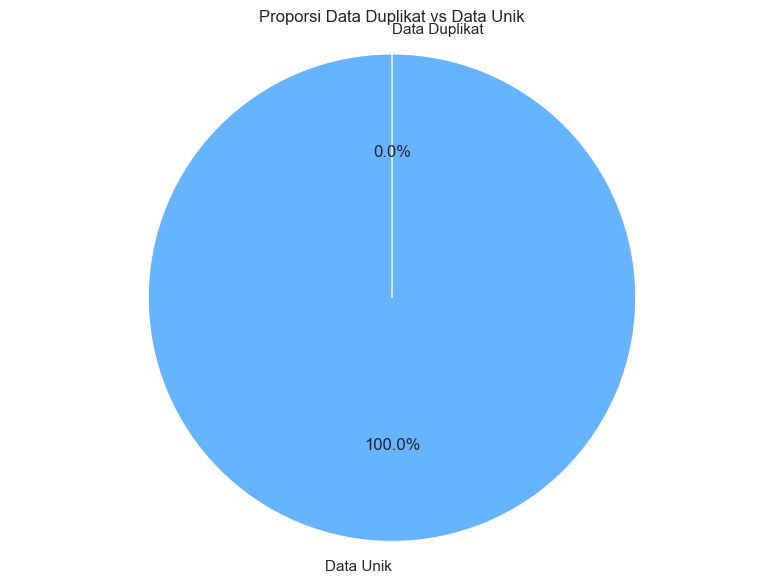


2. Missing Values (Nilai Hilang):


,Jumlah Nilai Hilang,Persentase (%)
Round-Trip Time [ms],2999253,95.916980
Region,1406419,44.977687
City,1391772,44.509272
Device Type,154,0.004925


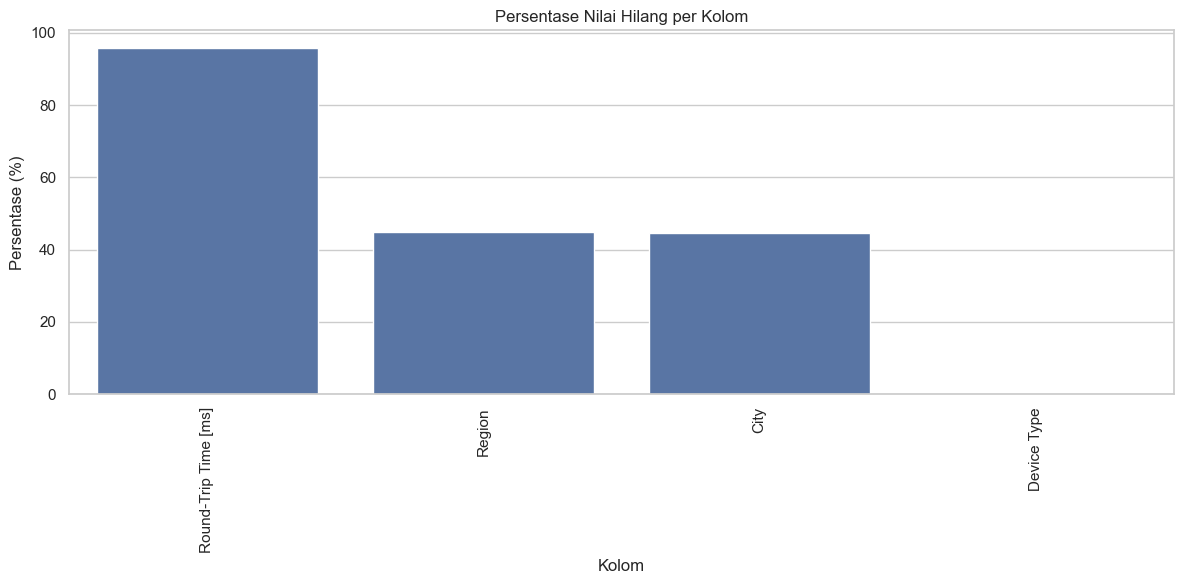


3. Outliers (Data Pencilan):
   - index: 0 outliers (0.00% dari total data)


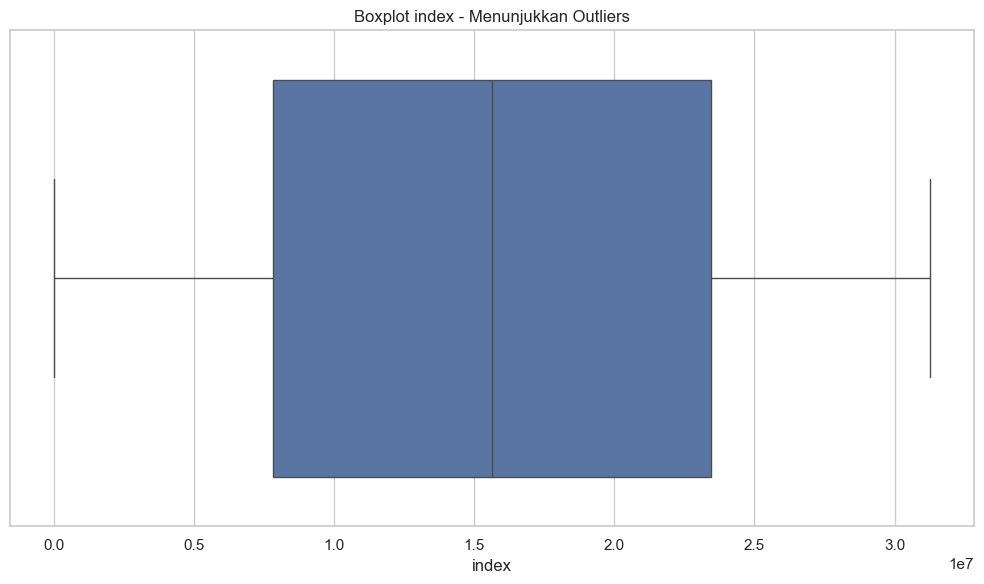

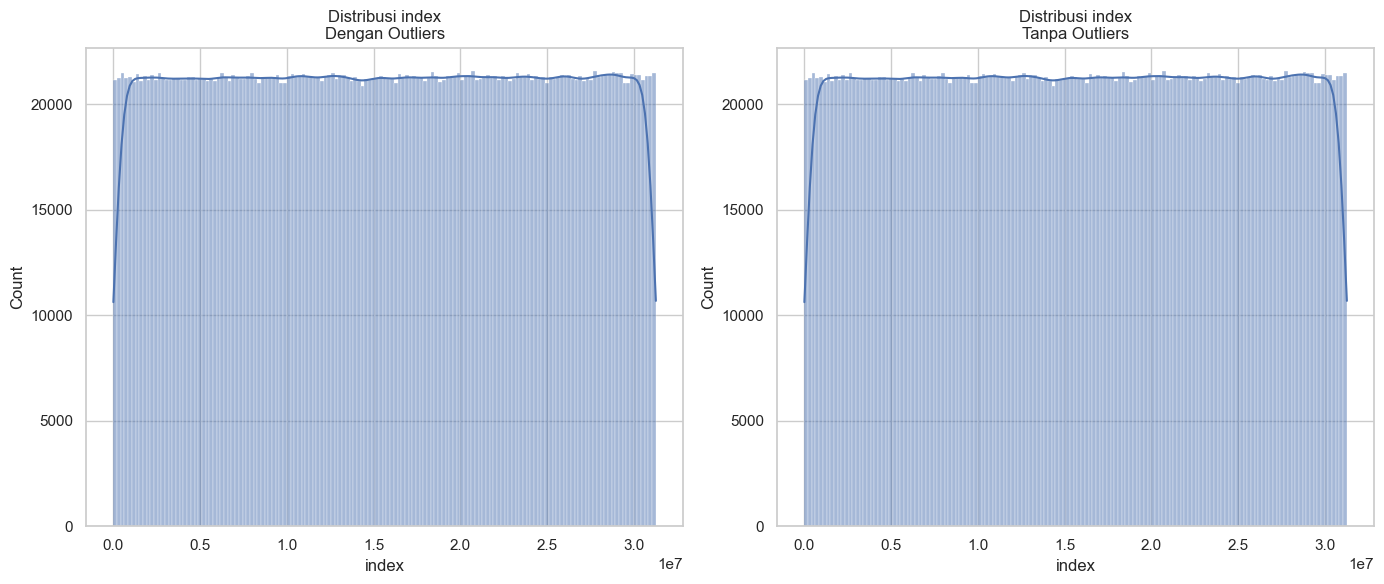

   - User ID: 41,701 outliers (1.33% dari total data)


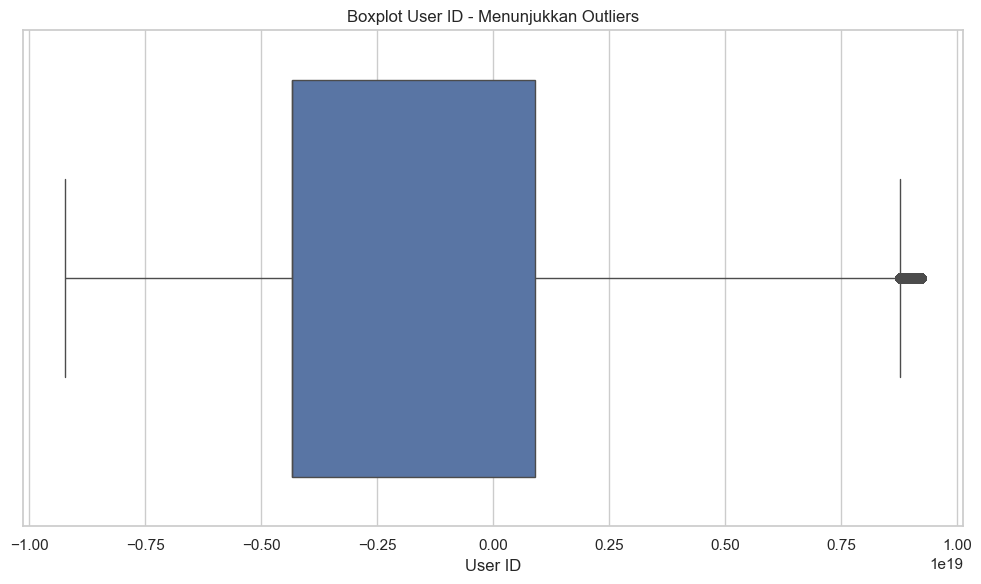

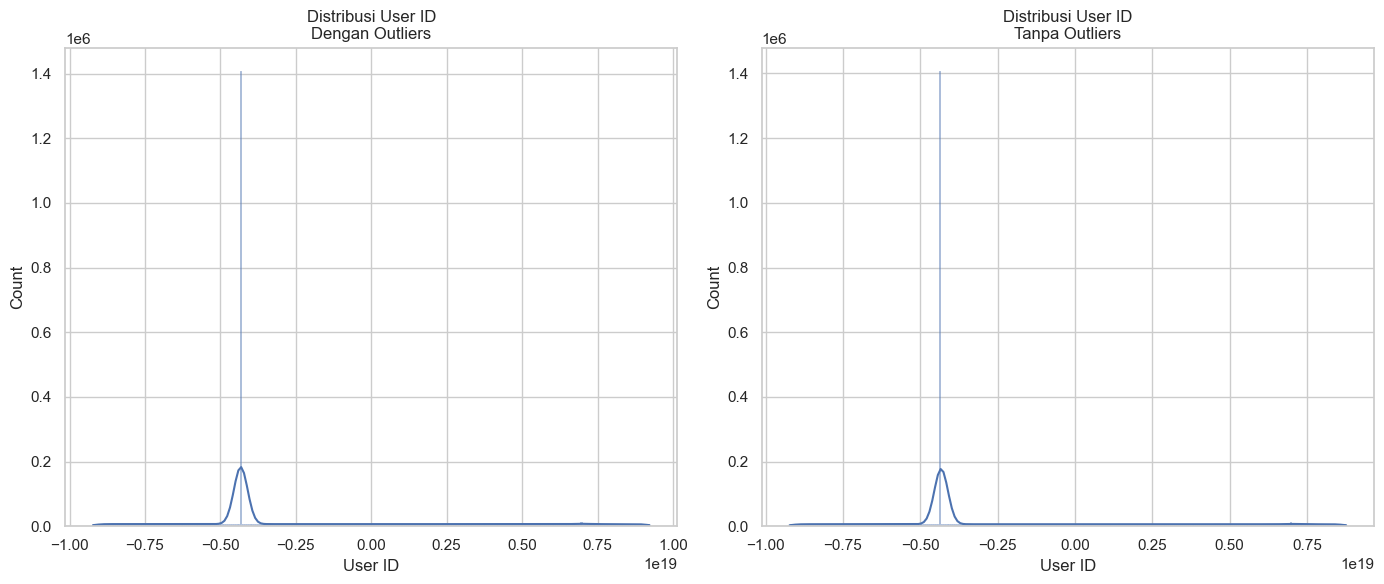

   - Round-Trip Time [ms]: 19,720 outliers (0.63% dari total data)


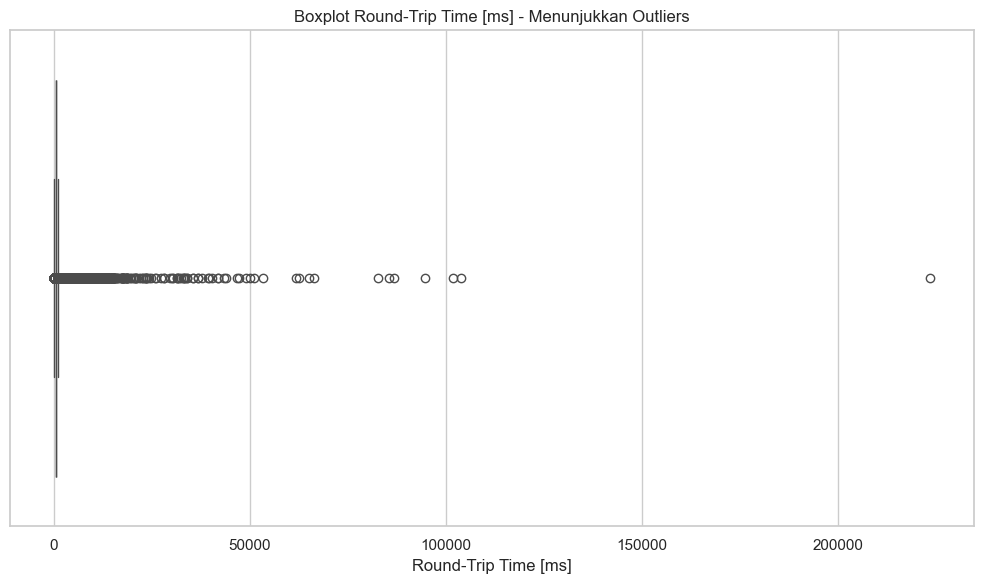

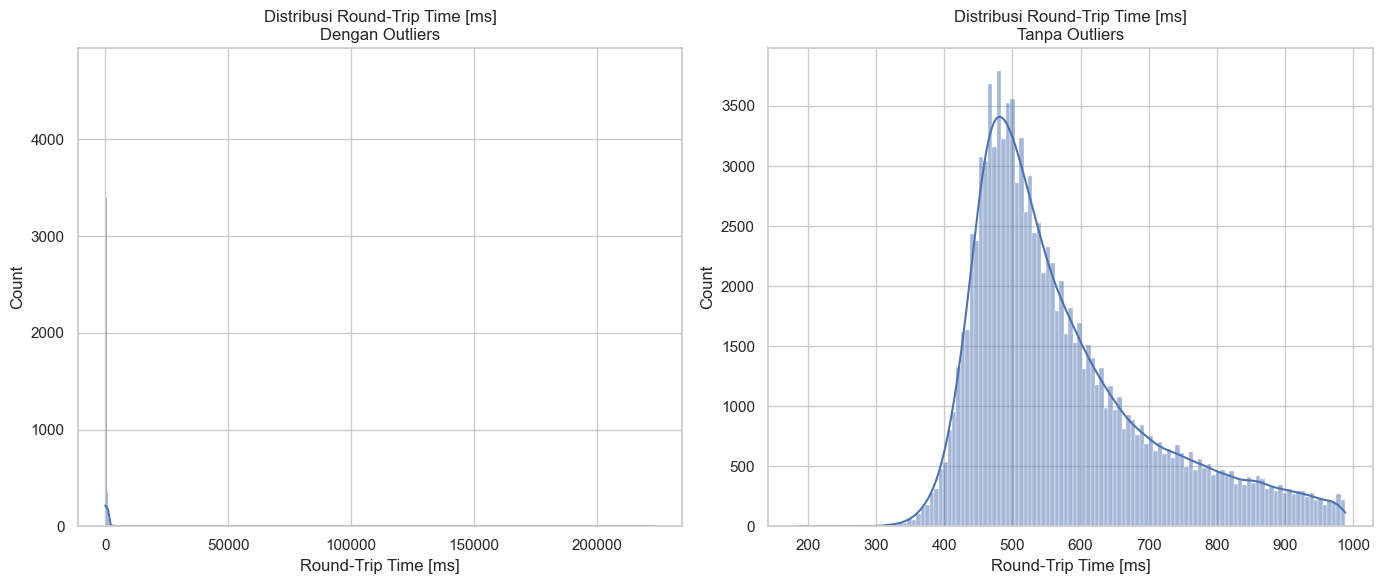

   - ASN: 0 outliers (0.00% dari total data)


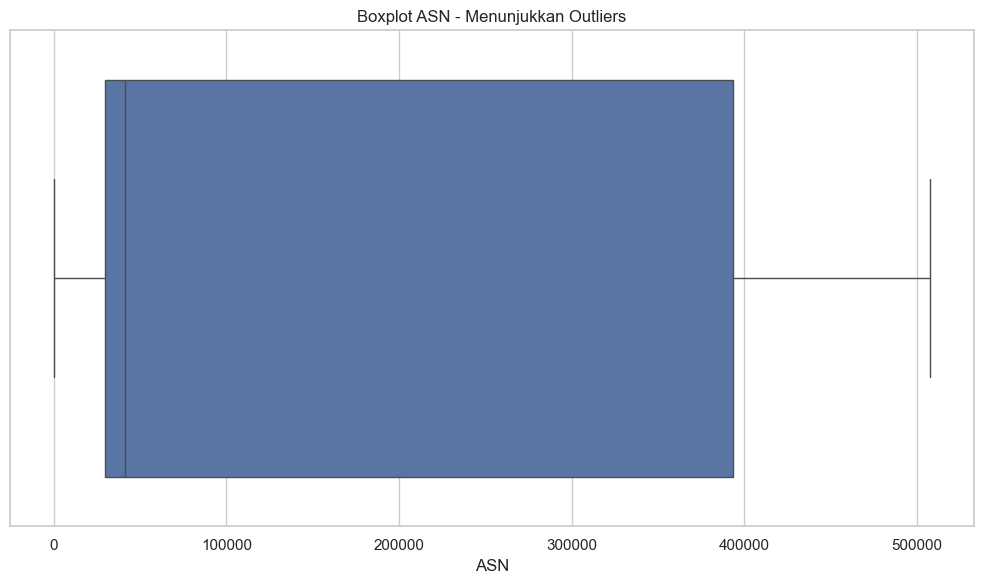

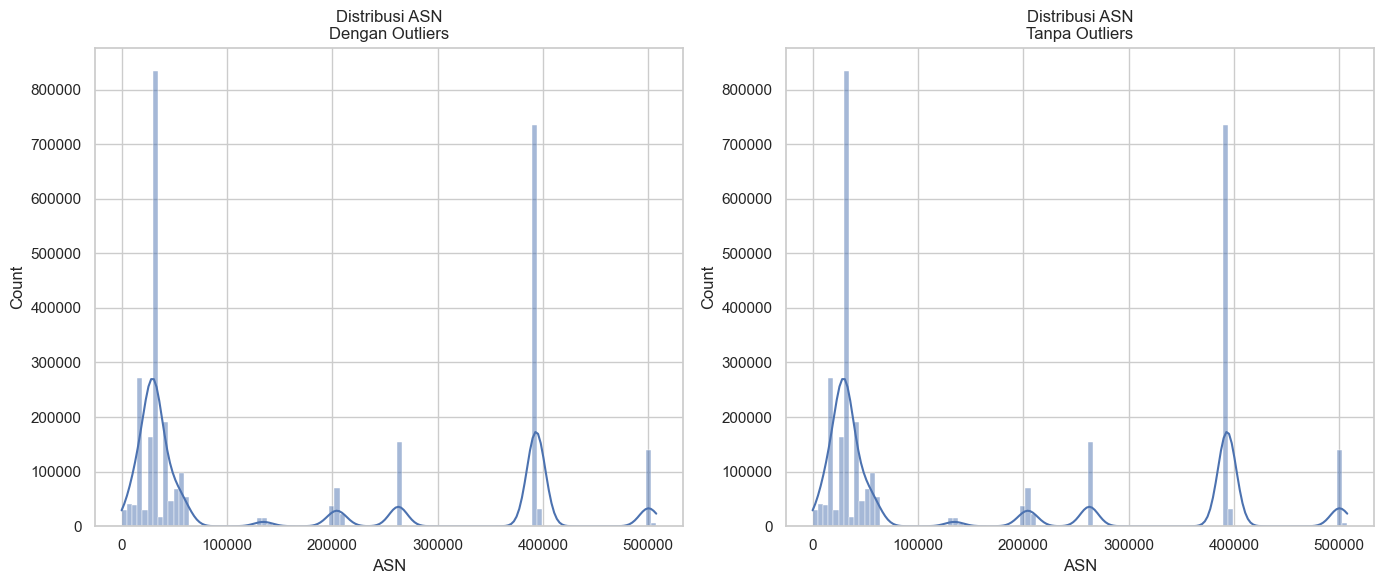


4. Ketidakseimbangan Kelas (Imbalanced Data):
   Distribusi kelas target 'Is Account Takeover':
   - False: 3,126,911 (100.00%)
   - True: 15 (0.00%)


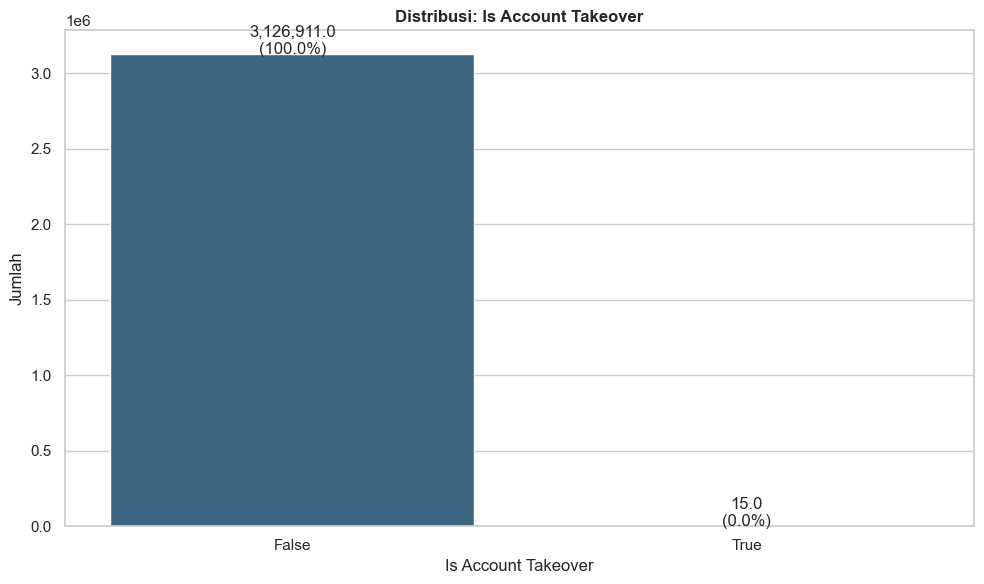

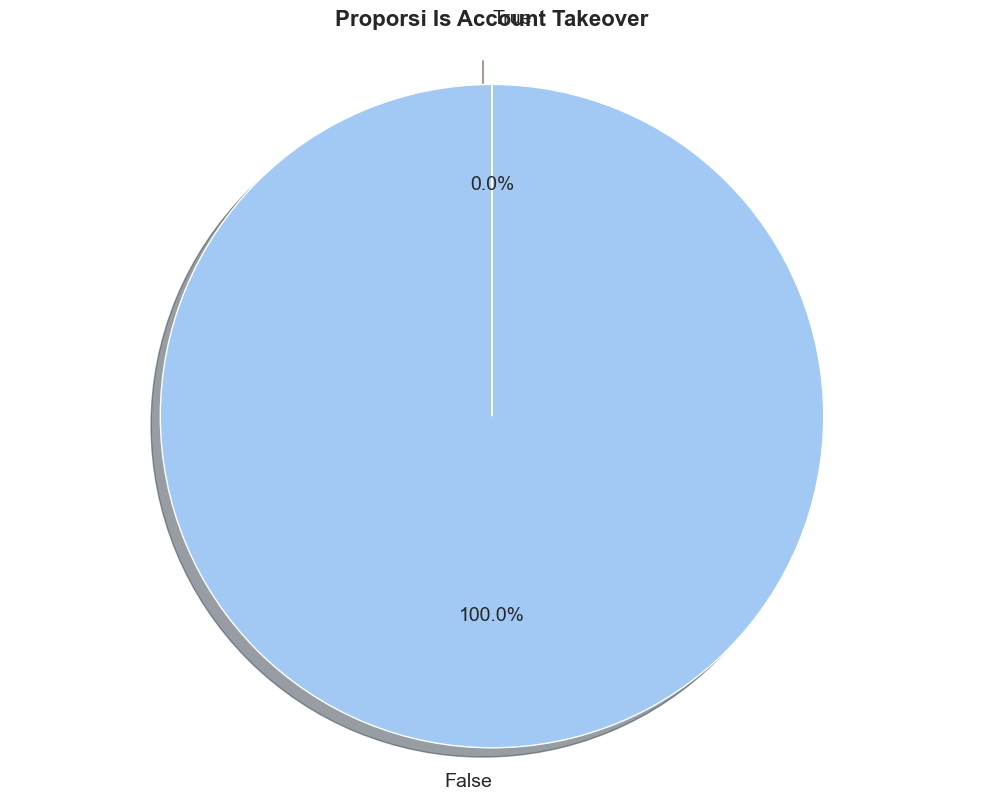


   Ketidakseimbangan pada fitur boolean lainnya:

   Login Successful:
   - False: 1,872,459 (59.88%)
   - True: 1,254,467 (40.12%)


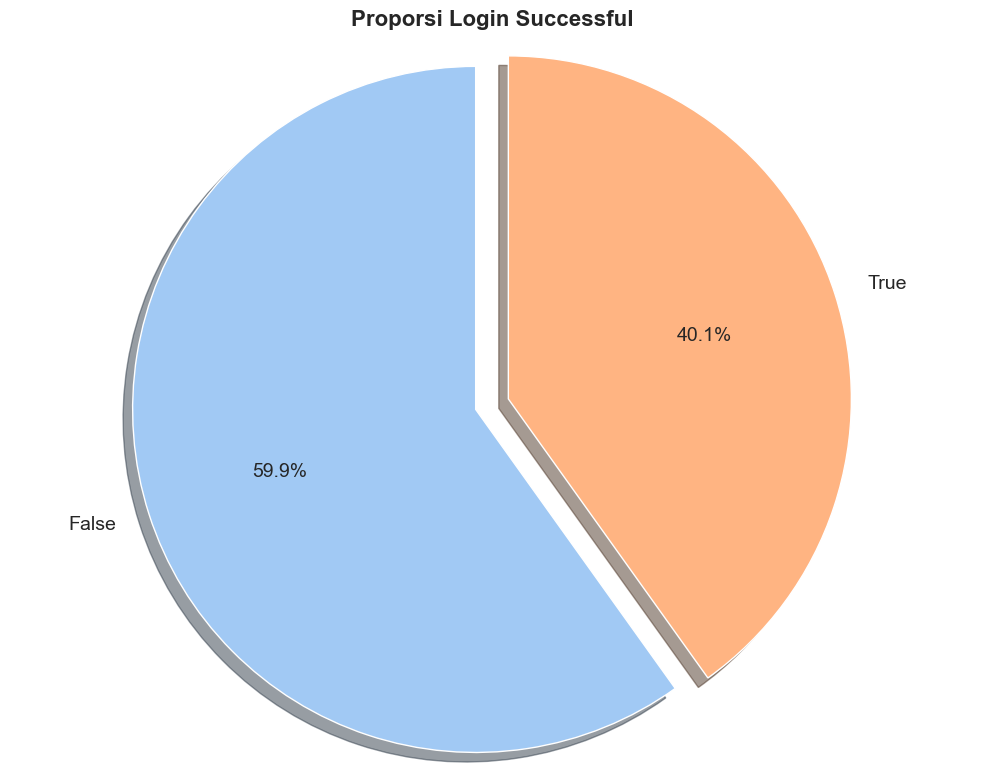


   Is Attack IP:
   - False: 2,817,477 (90.10%)
   - True: 309,449 (9.90%)


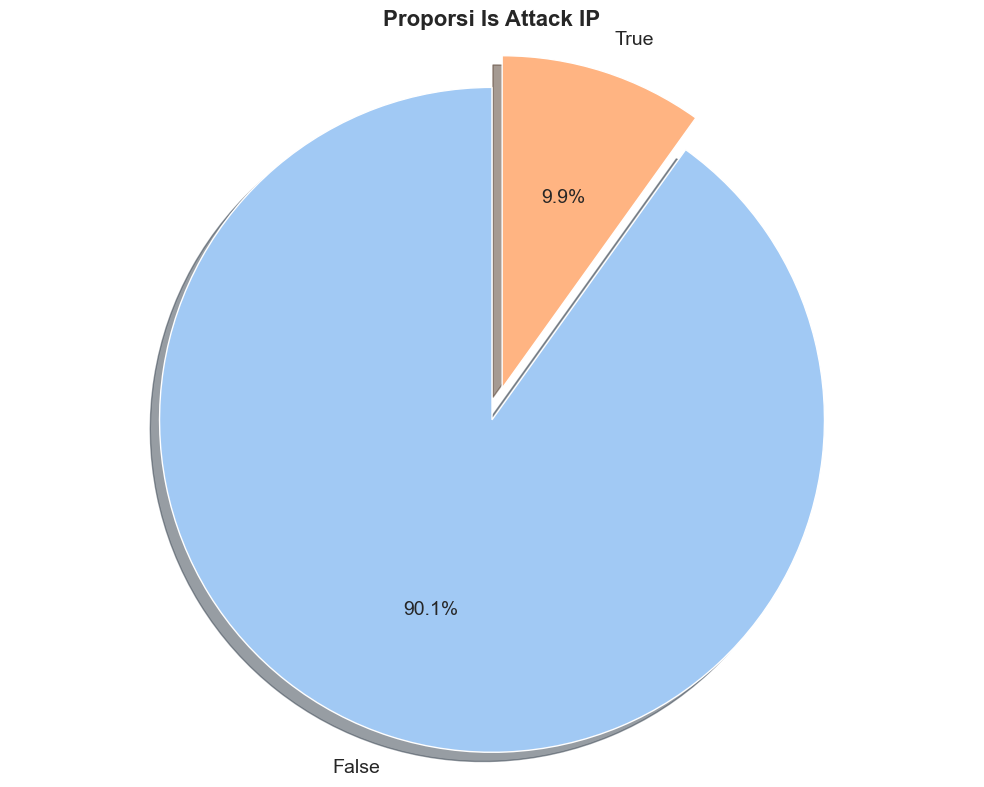


5. Visualisasi User ID:


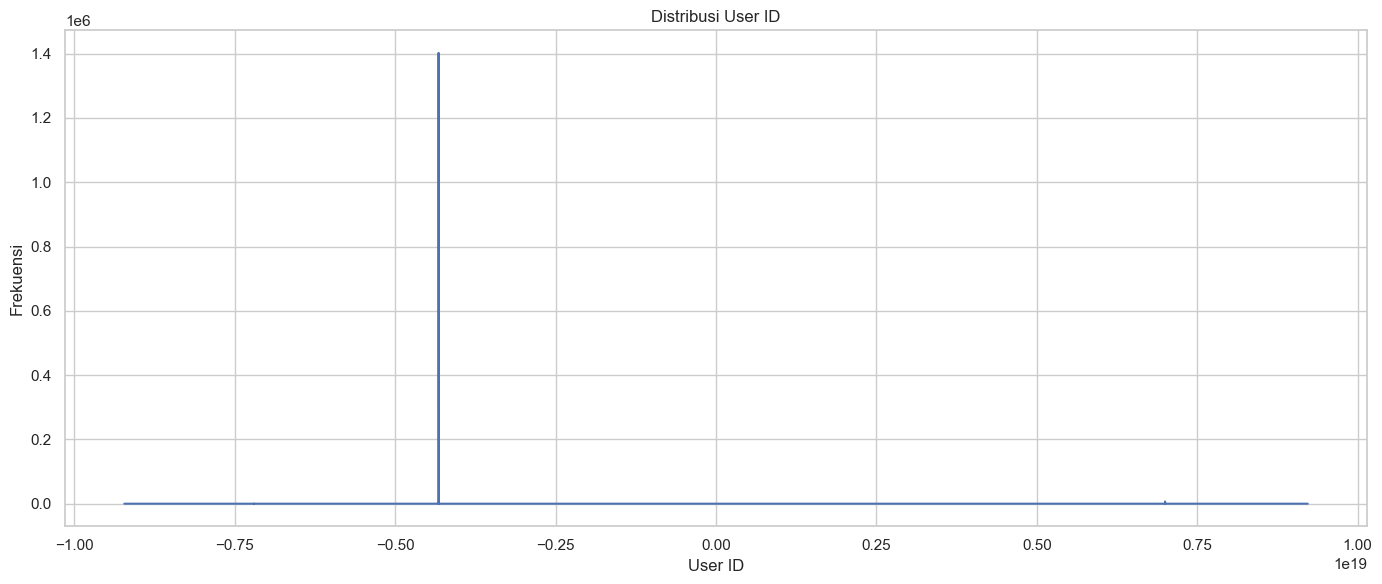

In [4]:
# B. Potensi Masalah Data
print("\nB. POTENSI MASALAH DATA")
print("-" * 50)

# 1. Kehadiran data duplikat
duplicates = df.duplicated().sum()
print(f"1. Data Duplikat: {duplicates:,} baris ({duplicates/len(df)*100:.2f}% dari total data)")

# Visualisasi data duplikat
plt.figure(figsize=(8, 6))
labels = ['Data Unik', 'Data Duplikat']
counts = [len(df) - duplicates, duplicates]
plt.pie(counts, labels=labels, autopct='%1.1f%%', colors=['#66b3ff', '#ff9999'], startangle=90)
plt.title('Proporsi Data Duplikat vs Data Unik')
plt.axis('equal')
plt.tight_layout()
plt.show()

# 2. Missing values atau data hilang
missing_values = df.isnull().sum()
missing_percent = (missing_values / len(df)) * 100
missing_df = pd.DataFrame({
    'Jumlah Nilai Hilang': missing_values,
    'Persentase (%)': missing_percent
})

print("\n2. Missing Values (Nilai Hilang):")
display(missing_df[missing_df['Jumlah Nilai Hilang'] > 0].sort_values('Jumlah Nilai Hilang', ascending=False))

# Jika tidak ada nilai hilang
if missing_df[missing_df['Jumlah Nilai Hilang'] > 0].empty:
    print("   Tidak ada missing values dalam dataset.")

# Visualisasi missing values
if not missing_df[missing_df['Jumlah Nilai Hilang'] > 0].empty:
    plt.figure(figsize=(12, 6))
    missing_cols = missing_df[missing_df['Jumlah Nilai Hilang'] > 0].sort_values('Jumlah Nilai Hilang', ascending=False)
    sns.barplot(x=missing_cols.index, y='Persentase (%)', data=missing_cols)
    plt.title('Persentase Nilai Hilang per Kolom')
    plt.xticks(rotation=90)
    plt.ylabel('Persentase (%)')
    plt.xlabel('Kolom')
    plt.tight_layout()
    plt.show()

# 3. Outliers atau data pencilan (untuk fitur numerik)
print("\n3. Outliers (Data Pencilan):")
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Untuk setiap kolom numerik, hitung outliers menggunakan IQR
for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)][col]
    
    print(f"   - {col}: {len(outliers):,} outliers ({len(outliers)/len(df)*100:.2f}% dari total data)")
    
    # Visualisasi boxplot untuk menunjukkan outliers
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot {col} - Menunjukkan Outliers')
    plt.xlabel(col)
    plt.tight_layout()
    plt.show()
    
    # Distribusi dengan dan tanpa outliers
    plt.figure(figsize=(14, 6))
    
    # Plot 1: Distribusi dengan outliers
    plt.subplot(1, 2, 1)
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribusi {col}\nDengan Outliers')
    plt.xlabel(col)
    
    # Plot 2: Distribusi tanpa outliers
    plt.subplot(1, 2, 2)
    sns.histplot(df[(df[col] >= lower_bound) & (df[col] <= upper_bound)][col], kde=True)
    plt.title(f'Distribusi {col}\nTanpa Outliers')
    plt.xlabel(col)
    
    plt.tight_layout()
    plt.show()

# 4. Ketidakseimbangan kelas (imbalanced data)
print("\n4. Ketidakseimbangan Kelas (Imbalanced Data):")

# Kolom target adalah 'Is Account Takeover'
target_col = 'Is Account Takeover'
if target_col in df.columns:
    class_counts = df[target_col].value_counts()
    print(f"   Distribusi kelas target '{target_col}':")
    for cls, count in class_counts.items():
        print(f"   - {cls}: {count:,} ({count/len(df)*100:.2f}%)")
    
    # Visualisasi ketidakseimbangan kelas
    plt.figure(figsize=(10, 6))
    ax = sns.countplot(x=target_col, data=df, palette='viridis')
    plt.title(f'Distribusi: {target_col}', fontweight='bold')
    plt.xlabel(target_col)
    plt.ylabel('Jumlah')
    
    # Tambahkan label jumlah di atas bar
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x() + p.get_width()/2., height + 0.1, f'{height:,}\n({height/len(df)*100:.1f}%)',
                ha="center", fontsize=12)
    
    plt.tight_layout()
    plt.show()
    
    # Visualisasi ketidakseimbangan dengan pie chart
    plt.figure(figsize=(10, 8))
    plt.pie(class_counts, labels=class_counts.index, autopct='%1.1f%%', 
           colors=sns.color_palette('pastel', len(class_counts)), startangle=90, 
           explode=[0.05] * len(class_counts), shadow=True, textprops={'fontsize': 14})
    plt.title(f'Proporsi {target_col}', fontsize=16, fontweight='bold')
    plt.axis('equal')
    plt.tight_layout()
    plt.show()
else:
    print(f"   Kolom '{target_col}' tidak ditemukan dalam dataset.")

# Cek juga ketidakseimbangan pada fitur boolean lainnya
bool_cols = [col for col in df.columns if df[col].dtype == bool and col != target_col]
if bool_cols:
    print("\n   Ketidakseimbangan pada fitur boolean lainnya:")
    for col in bool_cols:
        bool_counts = df[col].value_counts()
        print(f"\n   {col}:")
        for val, count in bool_counts.items():
            print(f"   - {val}: {count:,} ({count/len(df)*100:.2f}%)")
        
        # Visualisasi ketidakseimbangan dengan pie chart
        plt.figure(figsize=(10, 8))
        plt.pie(bool_counts, labels=bool_counts.index, autopct='%1.1f%%', 
               colors=sns.color_palette('pastel', len(bool_counts)), startangle=90, 
               explode=[0.05] * len(bool_counts), shadow=True, textprops={'fontsize': 14})
        plt.title(f'Proporsi {col}', fontsize=16, fontweight='bold')
        plt.axis('equal')
        plt.tight_layout()
        plt.show()

# Visualisasi User ID dengan line chart
print("\n5. Visualisasi User ID:")
if 'User ID' in df.columns:
    plt.figure(figsize=(14, 6))
    df['User ID'].value_counts().sort_index().plot(kind='line')
    plt.title('Distribusi User ID')
    plt.xlabel('User ID')
    plt.ylabel('Frekuensi')
    plt.tight_layout()
    plt.show()
else:
    print("   Kolom 'User ID' tidak ditemukan dalam dataset.")

In [4]:
# Ringkasan Eksplorasi Data
print("\nRINGKASAN EKSPLORASI DATA")
print("=" * 80)
print(f"""
Dataset ini terdiri dari {df.shape[0]:,} observasi dan {df.shape[1]:,} fitur.

A. Karakteristik Dataset:
   - Dataset berisi informasi login yang mencakup IP Address, lokasi geografis (Country, Region, City), 
     informasi perangkat (User Agent, OS, Browser, Device Type), serta indikator keberhasilan dan serangan.
   - Fitur target 'Is Account Takeover' menunjukkan apakah login merupakan upaya pengambilalihan akun.
   - Data numerik seperti 'ASN', 'Round-Trip Time [ms]' memiliki distribusi dengan rentang nilai yang bervariasi.
   - Mayoritas data berasal dari negara dan kota tertentu, yang mungkin mencerminkan pola penggunaan platform.

B. Potensi Masalah Data:
   - Duplikasi data: {'Terdeteksi ' + str(duplicates) + ' data duplikat' if duplicates > 0 else 'Tidak ada data duplikat'}.
   - Missing values: {'Terdeteksi nilai hilang pada beberapa kolom' if not missing_df[missing_df['Jumlah Nilai Hilang'] > 0].empty else 'Tidak ada nilai hilang'}.
   - Outliers: Terdapat outliers pada beberapa fitur numerik, terutama pada 'Round-Trip Time [ms]' dan 'ASN'.
   - Ketidakseimbangan kelas: Data target 'Is Account Takeover' menunjukkan ketidakseimbangan dengan distribusi {df[target_col].value_counts()[True]/len(df)*100:.2f}% serangan dan {df[target_col].value_counts()[False]/len(df)*100:.2f}% bukan serangan.

Temuan-temuan ini akan menjadi dasar untuk prapemrosesan data dan pemilihan model yang sesuai.
""")


RINGKASAN EKSPLORASI DATA

Dataset ini terdiri dari 3,126,926 observasi dan 16 fitur.

A. Karakteristik Dataset:
   - Dataset berisi informasi login yang mencakup IP Address, lokasi geografis (Country, Region, City), 
     informasi perangkat (User Agent, OS, Browser, Device Type), serta indikator keberhasilan dan serangan.
   - Fitur target 'Is Account Takeover' menunjukkan apakah login merupakan upaya pengambilalihan akun.
   - Data numerik seperti 'ASN', 'Round-Trip Time [ms]' memiliki distribusi dengan rentang nilai yang bervariasi.
   - Mayoritas data berasal dari negara dan kota tertentu, yang mungkin mencerminkan pola penggunaan platform.

B. Potensi Masalah Data:
   - Duplikasi data: Tidak ada data duplikat.
   - Missing values: Terdeteksi nilai hilang pada beberapa kolom.
   - Outliers: Terdapat outliers pada beberapa fitur numerik, terutama pada 'Round-Trip Time [ms]' dan 'ASN'.
   - Ketidakseimbangan kelas: Data target 'Is Account Takeover' menunjukkan ketidakseimbangan den


INFORMASI FITUR NUMERIK DAN LOGIN TIMESTAMP

Fitur: index
--------------------------------------------------------------------------------
Jumlah Nilai Hilang: 0
Persentase Nilai Hilang: 0.00%
Nilai Minimum: 12
Nilai Maksimum: 31269263
Rata-rata: 15643723.736184355
Median: 15647998.5
Standar Deviasi: 9028471.046060715
Kuartil 1: 7825588.0
Kuartil 3: 23462834.75
Rentang Interkuartil (IQR): 15637246.75
Jumlah Outliers: 0
Jumlah Nilai Unik: 3126926


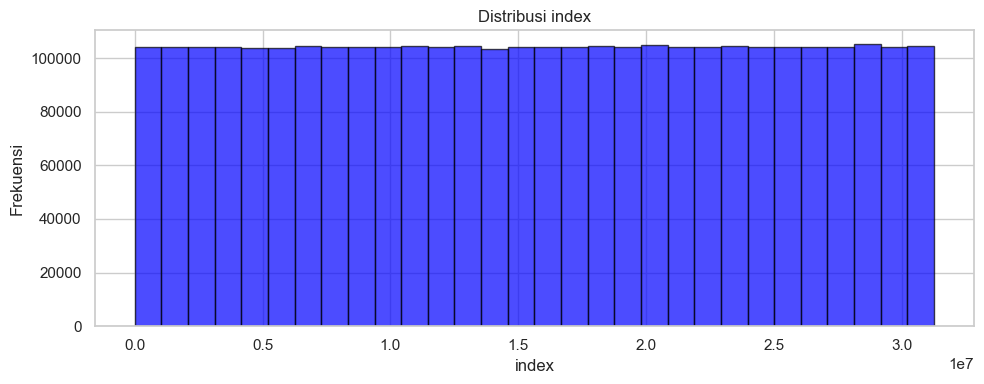

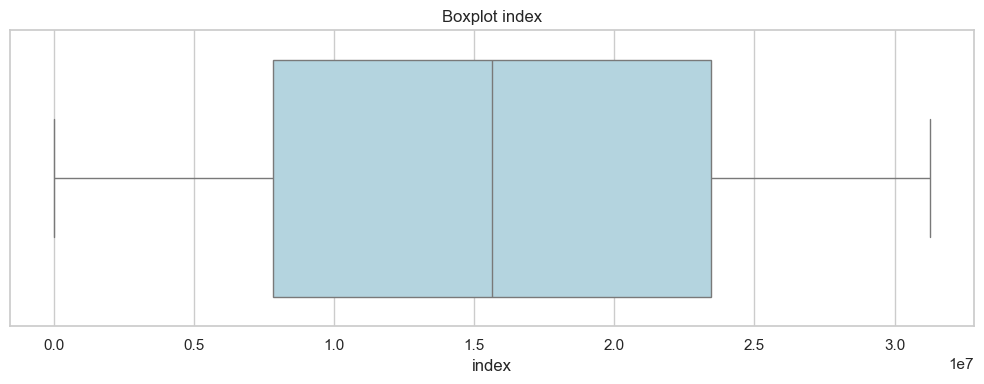


Fitur: User ID
--------------------------------------------------------------------------------
Jumlah Nilai Hilang: 0
Persentase Nilai Hilang: 0.00%
Nilai Minimum: -9223351024921207274
Nilai Maksimum: 9223351489996728661
Rata-rata: -1.9256102048107505e+18
Median: -4.3244755833065917e+18
Standar Deviasi: 4.5124324722410957e+18
Kuartil 1: -4.3244755833065917e+18
Kuartil 3: 9.137411487257236e+17
Rentang Interkuartil (IQR): 5.238216732032315e+18
Jumlah Outliers: 41701
Jumlah Nilai Unik: 1159709


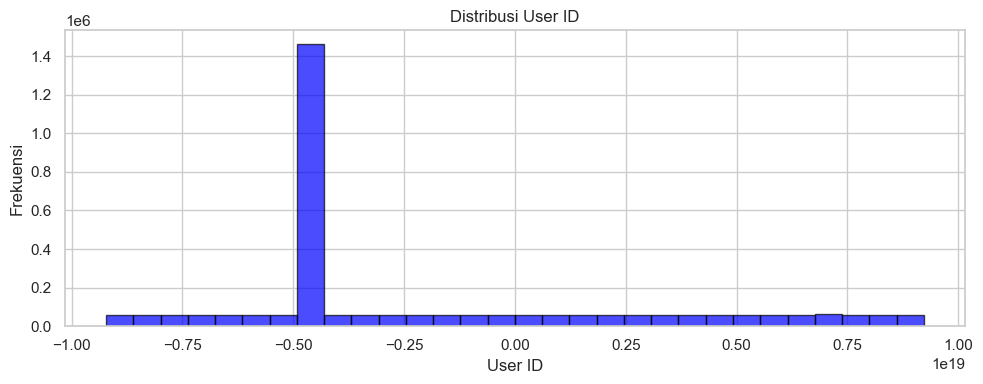

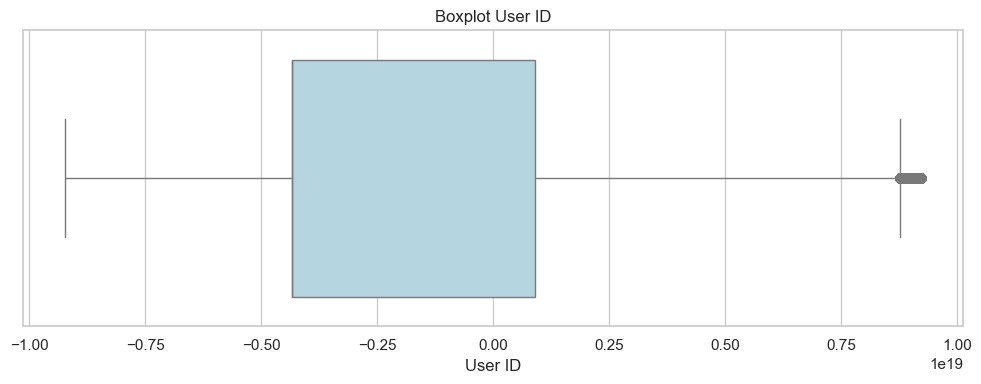


Fitur: Round-Trip Time [ms]
--------------------------------------------------------------------------------
Jumlah Nilai Hilang: 2999253
Persentase Nilai Hilang: 95.92%
Nilai Minimum: 9.0
Nilai Maksimum: 223457.0
Rata-rata: 670.151472903433
Median: 538.0
Standar Deviasi: 1354.4417843280642
Kuartil 1: 471.0
Kuartil 3: 678.0
Rentang Interkuartil (IQR): 207.0
Jumlah Outliers: 19720
Jumlah Nilai Unik: 3417


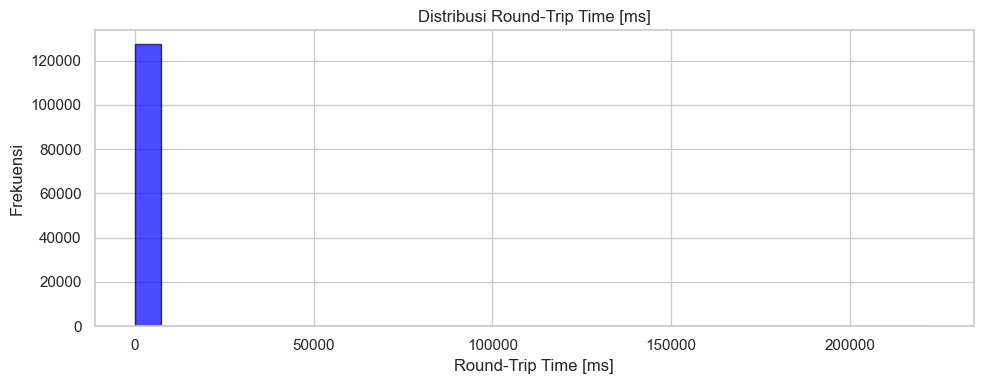

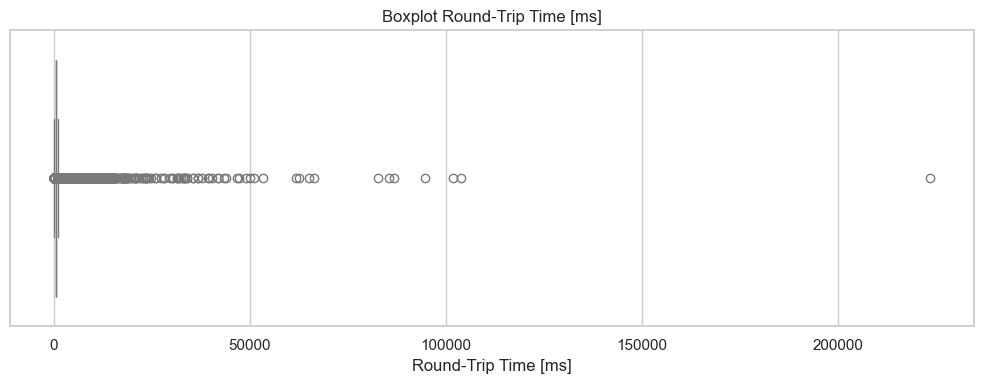


Fitur: ASN
--------------------------------------------------------------------------------
Jumlah Nilai Hilang: 0
Persentase Nilai Hilang: 0.00%
Nilai Minimum: 12
Nilai Maksimum: 507727
Rata-rata: 162103.09092220283
Median: 41164.0
Standar Deviasi: 171917.9596880245
Kuartil 1: 29695.0
Kuartil 3: 393398.0
Rentang Interkuartil (IQR): 363703.0
Jumlah Outliers: 0
Jumlah Nilai Unik: 7113


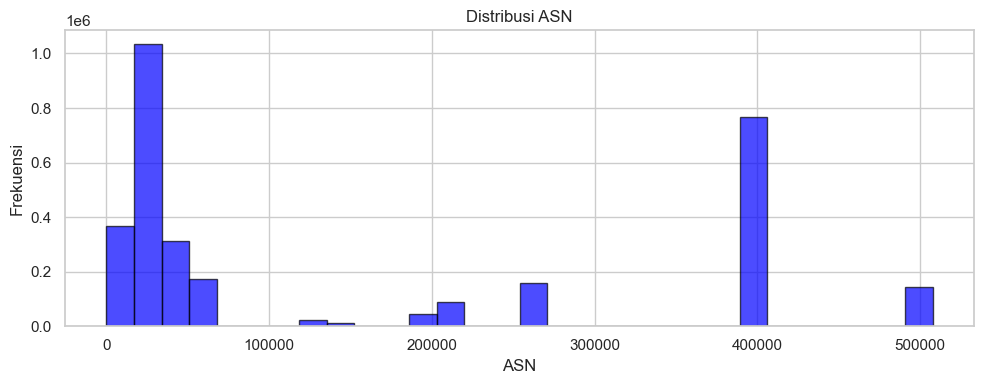

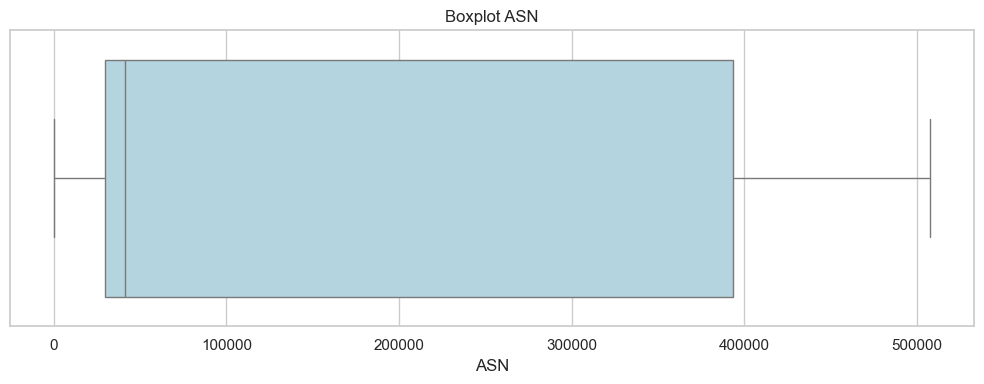


Fitur: Login Timestamp
--------------------------------------------------------------------------------
Jumlah Nilai Hilang: 0
Persentase Nilai Hilang: 0.00%
Nilai Minimum: 2020-02-03 12:44:25.789
Nilai Maksimum: 2021-02-28 23:59:58.756
Jumlah Nilai Unik: 3126921


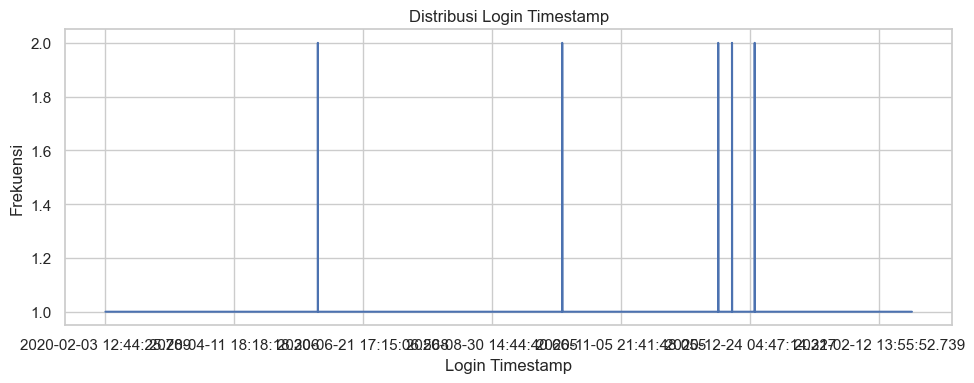

In [13]:
# Informasi lengkap mengenai fitur numerik dan Login Timestamp
print("\nINFORMASI FITUR NUMERIK DAN LOGIN TIMESTAMP")
print("=" * 80)

# Mendapatkan kolom numerik dan kolom Login Timestamp
numeric_cols = df.select_dtypes(include=['number']).columns
timestamp_col = 'Login Timestamp'

# Menampilkan statistik deskriptif untuk setiap kolom numerik
for col in numeric_cols:
    print(f"\nFitur: {col}")
    print("-" * 80)
    print(f"Jumlah Nilai Hilang: {df[col].isnull().sum()}")
    print(f"Persentase Nilai Hilang: {df[col].isnull().mean() * 100:.2f}%")
    print(f"Nilai Minimum: {df[col].min()}")
    print(f"Nilai Maksimum: {df[col].max()}")
    print(f"Rata-rata: {df[col].mean()}")
    print(f"Median: {df[col].median()}")
    print(f"Standar Deviasi: {df[col].std()}")
    print(f"Kuartil 1: {df[col].quantile(0.25)}")
    print(f"Kuartil 3: {df[col].quantile(0.75)}")
    print(f"Rentang Interkuartil (IQR): {df[col].quantile(0.75) - df[col].quantile(0.25)}")
    print(f"Jumlah Outliers: {((df[col] < (df[col].quantile(0.25) - 1.5 * (df[col].quantile(0.75) - df[col].quantile(0.25)))) | (df[col] > (df[col].quantile(0.75) + 1.5 * (df[col].quantile(0.75) - df[col].quantile(0.25))))).sum()}")
    print(f"Jumlah Nilai Unik: {df[col].nunique()}")
    
    # Visualisasi distribusi fitur numerik dengan histogram
    plt.figure(figsize=(10, 4))
    df[col].plot(kind='hist', bins=30, alpha=0.7, color='blue', edgecolor='black')
    plt.title(f'Distribusi {col}')
    plt.xlabel(col)
    plt.ylabel('Frekuensi')
    plt.tight_layout()
    plt.show()

    # Visualisasi boxplot untuk mendeteksi outliers
    plt.figure(figsize=(10, 4))
    sns.boxplot(x=df[col], color='lightblue')
    plt.title(f'Boxplot {col}')
    plt.xlabel(col)
    plt.tight_layout()
    plt.show()

# Menampilkan informasi untuk kolom Login Timestamp
if timestamp_col in df.columns:
    print(f"\nFitur: {timestamp_col}")
    print("-" * 80)
    print(f"Jumlah Nilai Hilang: {df[timestamp_col].isnull().sum()}")
    print(f"Persentase Nilai Hilang: {df[timestamp_col].isnull().mean() * 100:.2f}%")
    print(f"Nilai Minimum: {df[timestamp_col].min()}")
    print(f"Nilai Maksimum: {df[timestamp_col].max()}")
    print(f"Jumlah Nilai Unik: {df[timestamp_col].nunique()}")
    
    # Visualisasi distribusi Login Timestamp dengan line chart
    plt.figure(figsize=(10, 4))
    df[timestamp_col].value_counts().sort_index().plot(kind='line')
    plt.title('Distribusi Login Timestamp')
    plt.xlabel('Login Timestamp')
    plt.ylabel('Frekuensi')
    plt.tight_layout()
    plt.show()
else:
    print(f"\nKolom '{timestamp_col}' tidak ditemukan dalam dataset.")


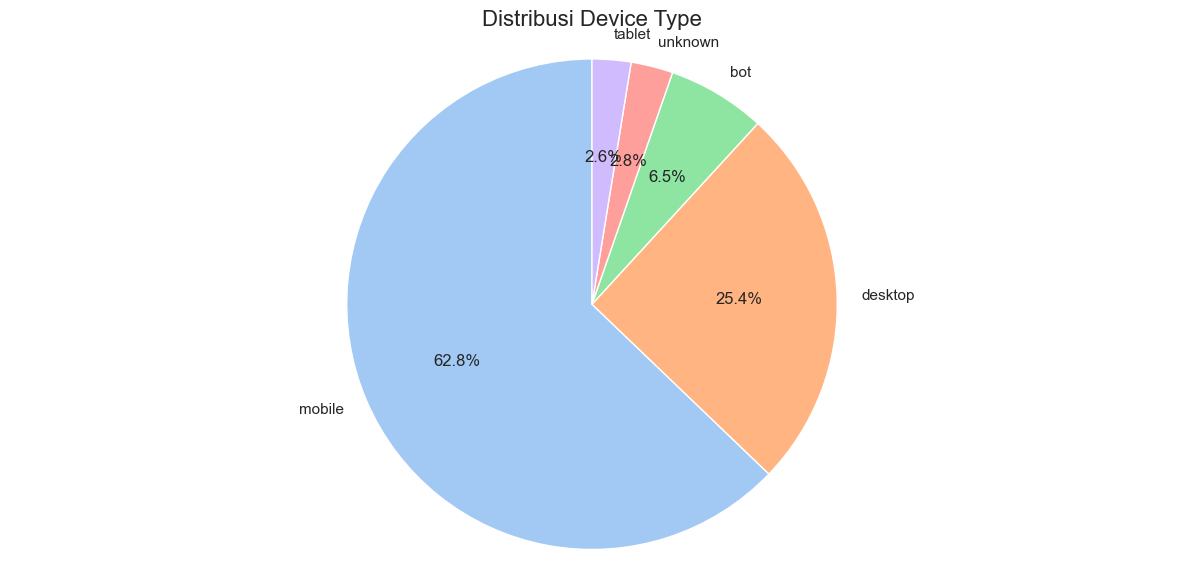

In [5]:
# Visualisasi Device Type dengan pie chart
plt.figure(figsize=(12, 6))
device_type_counts = df['Device Type'].value_counts(normalize=True) * 100
plt.pie(device_type_counts, labels=device_type_counts.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('pastel', len(device_type_counts)))
plt.title('Distribusi Device Type', fontsize=16)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.tight_layout()
plt.show()


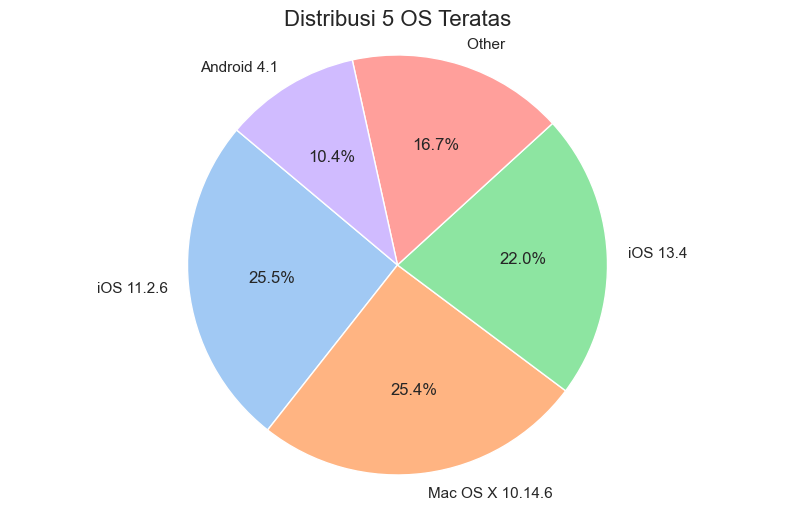

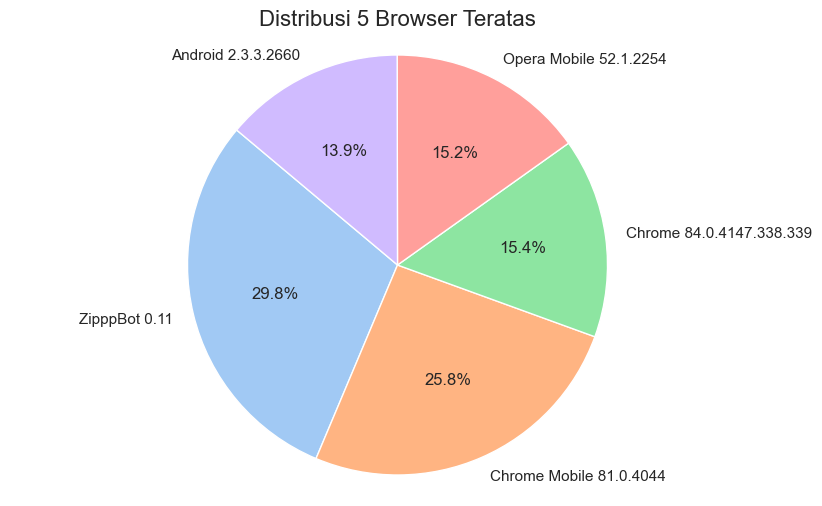

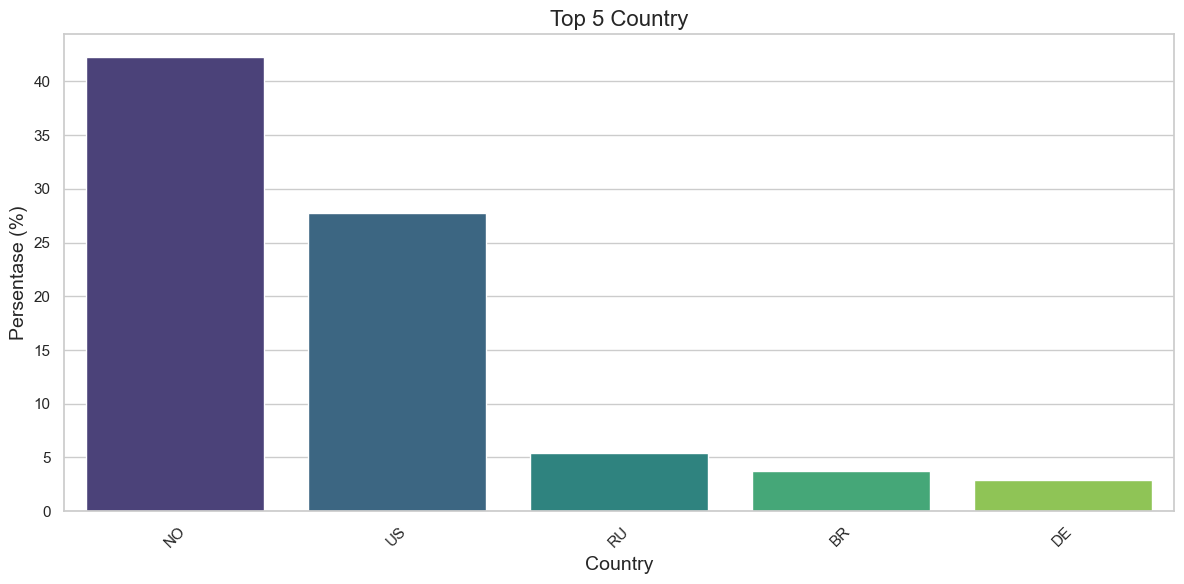

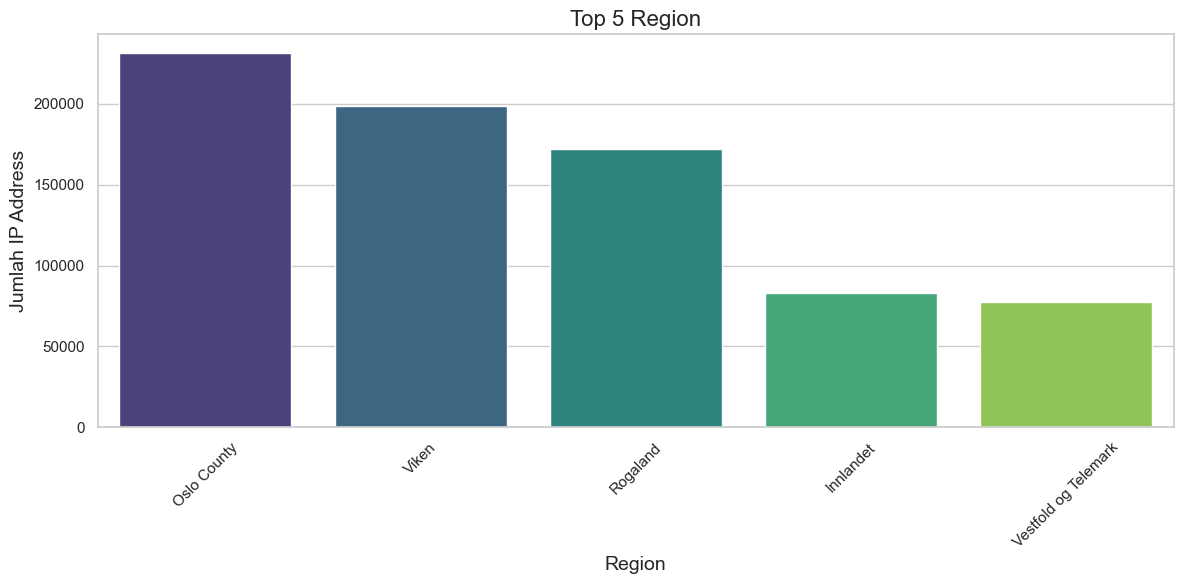

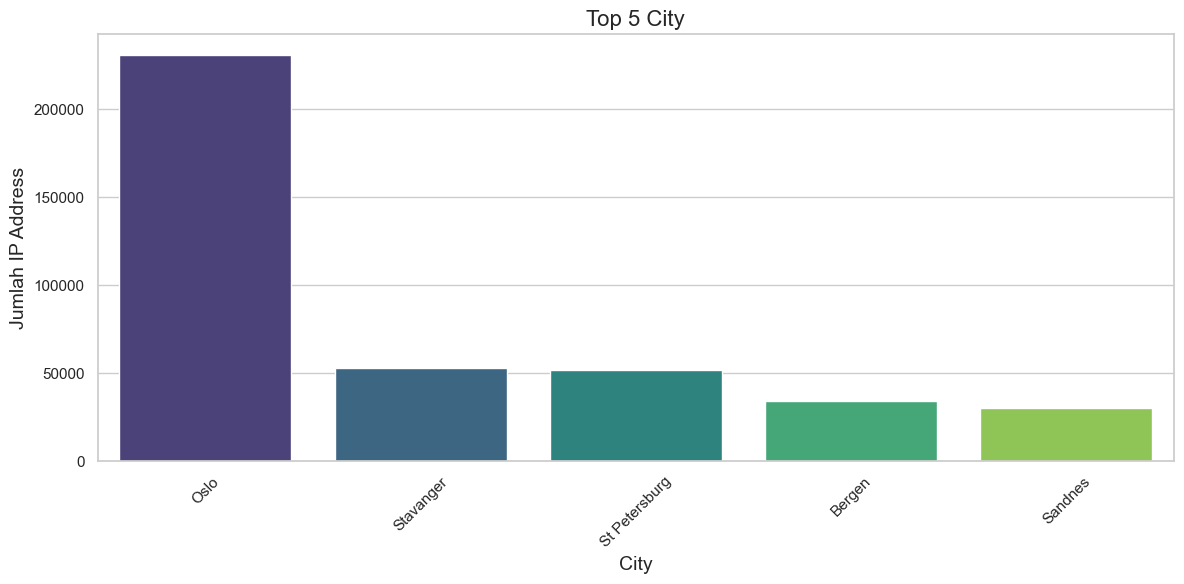

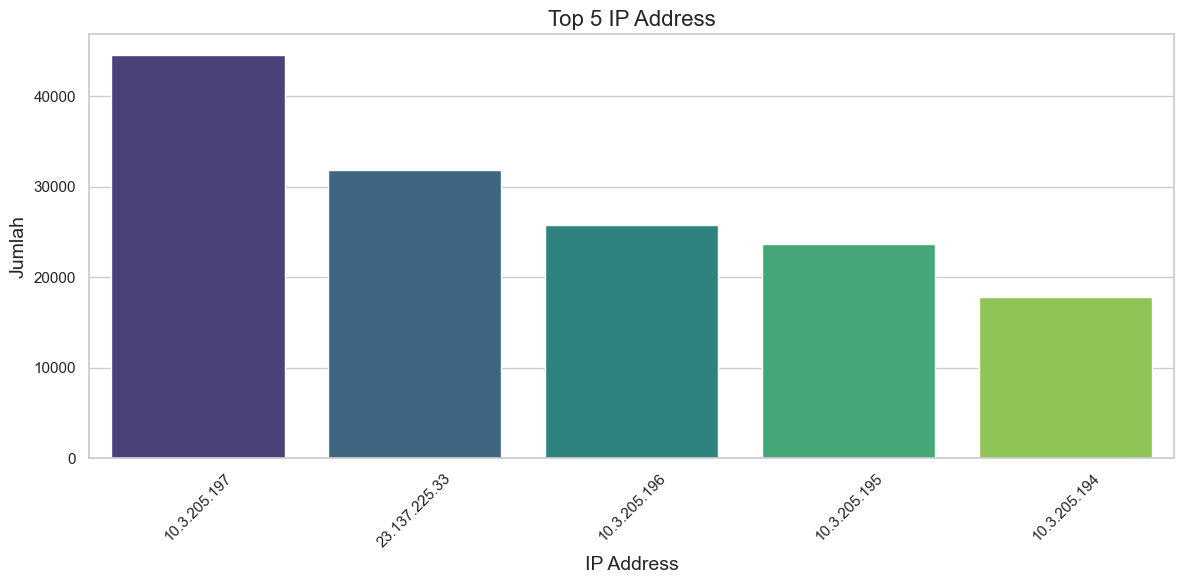

In [ ]:

# Visualisasi Pie Chart untuk 5 OS Teratas
plt.figure(figsize=(10, 6))
top_os = df['OS Name and Version'].value_counts().nlargest(5)
plt.pie(top_os, labels=top_os.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))
plt.title('Distribusi 5 OS Teratas', fontsize=16)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

# Visualisasi Pie Chart untuk 5 Browser Teratas
plt.figure(figsize=(10, 6))
top_browsers = df['Browser Name and Version'].value_counts().nlargest(5)
plt.pie(top_browsers, labels=top_browsers.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))
plt.title('Distribusi 5 Browser Teratas', fontsize=16)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

# Visualisasi Bar Chart untuk IP Address berdasarkan Country dalam Persentase
plt.figure(figsize=(12, 6))
country_counts = df['Country'].value_counts(normalize=True).nlargest(5) * 100
sns.barplot(x=country_counts.index, y=country_counts.values, palette='viridis')
plt.title('Top 5 Country', fontsize=16)
plt.xlabel('Country', fontsize=14)
plt.ylabel('Persentase (%)', fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Visualisasi Bar Chart untuk IP Address berdasarkan Region
plt.figure(figsize=(12, 6))
region_counts = df['Region'].value_counts()(normalize=True).nlargest(5) * 100
sns.barplot(x=region_counts.index, y=region_counts.values, palette='viridis')
plt.title('Top 5 Region', fontsize=16)
plt.xlabel('Region', fontsize=14)
plt.ylabel('Persentase %', fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Visualisasi Bar Chart untuk IP Address berdasarkan City
plt.figure(figsize=(12, 6))
city_counts = df['City'].value_counts()(normalize=True).nlargest(5) * 100
sns.barplot(x=city_counts.index, y=city_counts.values, palette='viridis')
plt.title('Top 5 City', fontsize=16)
plt.xlabel('City', fontsize=14)
plt.ylabel('Persentase %', fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Visualisasi Bar Chart untuk IP Address
plt.figure(figsize=(12, 6))
ip_counts = df['IP Address'].value_counts().nlargest(5)
sns.barplot(x=ip_counts.index, y=ip_counts.values, palette='viridis')
plt.title('Top 5 IP Address', fontsize=16)
plt.xlabel('IP Address', fontsize=14)
plt.ylabel('Jumlah', fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


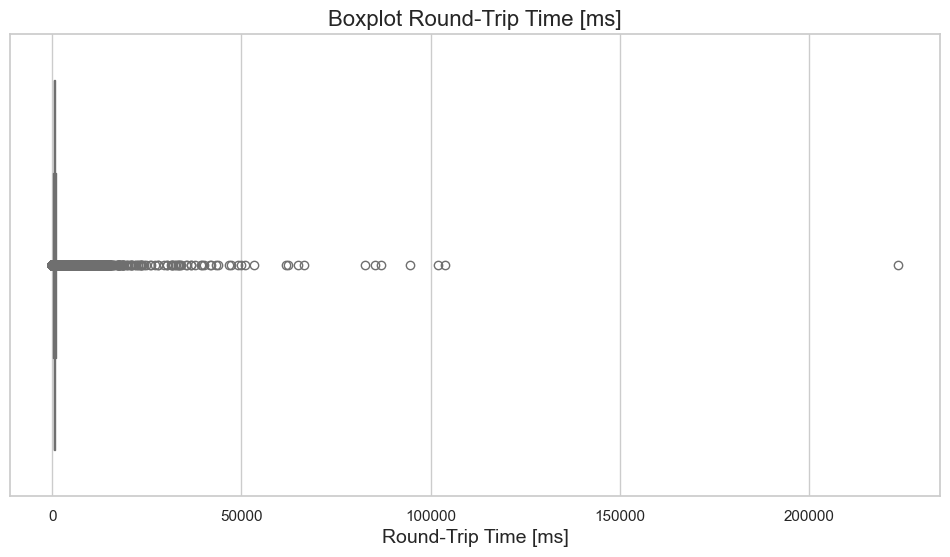

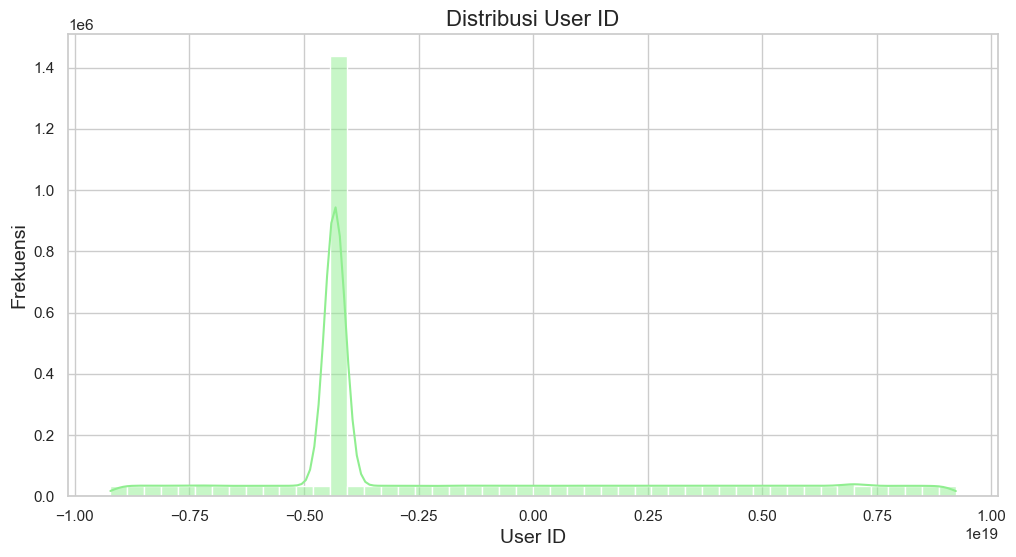

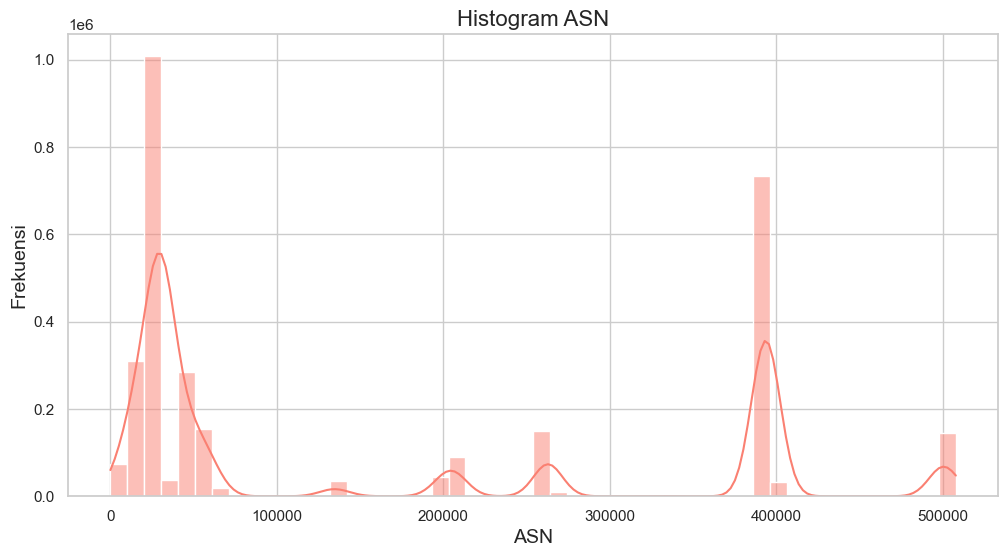

In [12]:

# Visualisasi Boxplot untuk Round-Trip Time [ms]
plt.figure(figsize=(12, 6))
sns.boxplot(x=df['Round-Trip Time [ms]'], color='skyblue')
plt.title('Boxplot Round-Trip Time [ms]', fontsize=16)
plt.xlabel('Round-Trip Time [ms]', fontsize=14)
plt.show()

# Visualisasi Distribusi User ID
plt.figure(figsize=(12, 6))
sns.histplot(df['User ID'], bins=50, kde=True, color='lightgreen')
plt.title('Distribusi User ID', fontsize=16)
plt.xlabel('User ID', fontsize=14)
plt.ylabel('Frekuensi', fontsize=14)
plt.show()

# Visualisasi Histogram untuk ASN
plt.figure(figsize=(12, 6))
sns.histplot(df['ASN'], bins=50, kde=True, color='salmon')
plt.title('Histogram ASN', fontsize=16)
plt.xlabel('ASN', fontsize=14)
plt.ylabel('Frekuensi', fontsize=14)
plt.show()



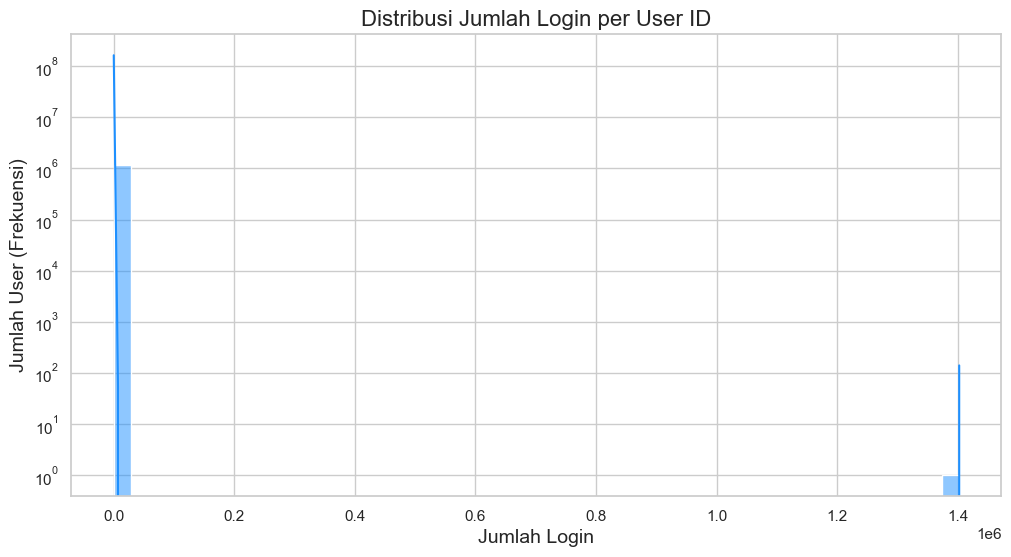

Login Timestamp memiliki nilai unik yang sangat tinggi karena mencatat waktu spesifik setiap login. Untuk mendapatkan pemahaman yang lebih baik, data waktu dikonversi ke dalam jam dan hari. Visualisasi distribusi login per jam berikut menunjukkan kecenderungan waktu login pengguna.


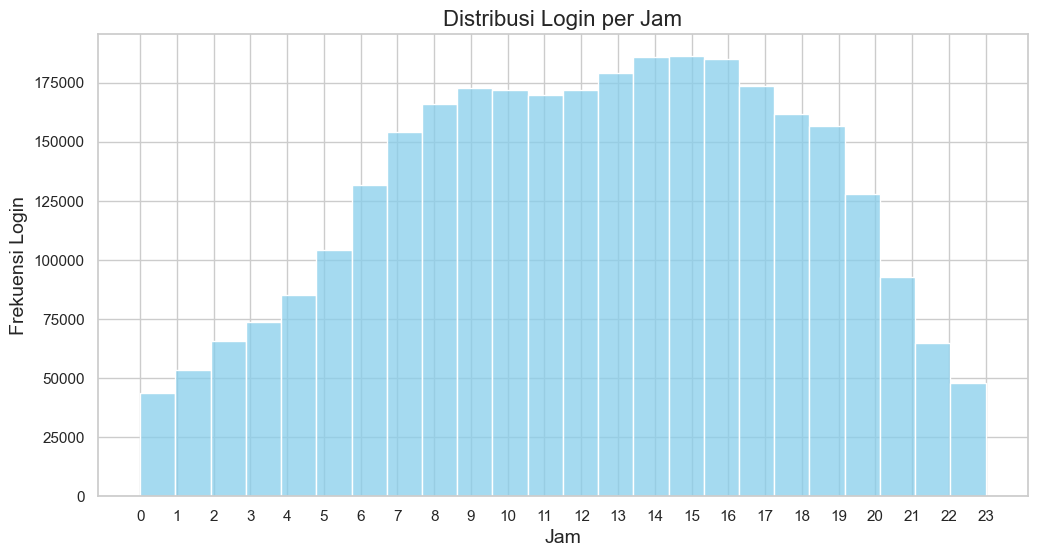

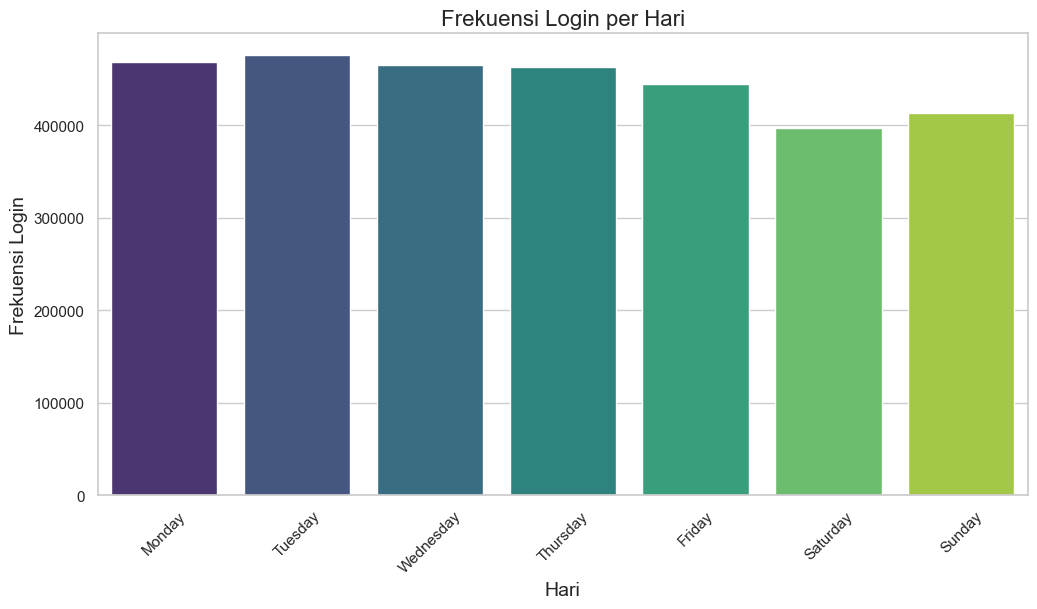

Fitur ASN menunjukkan variasi penyedia layanan internet yang digunakan oleh pengguna. Sebagian besar login berasal dari ASN tertentu secara signifikan lebih banyak dibandingkan yang lain, sebagaimana ditunjukkan pada visualisasi berikut.


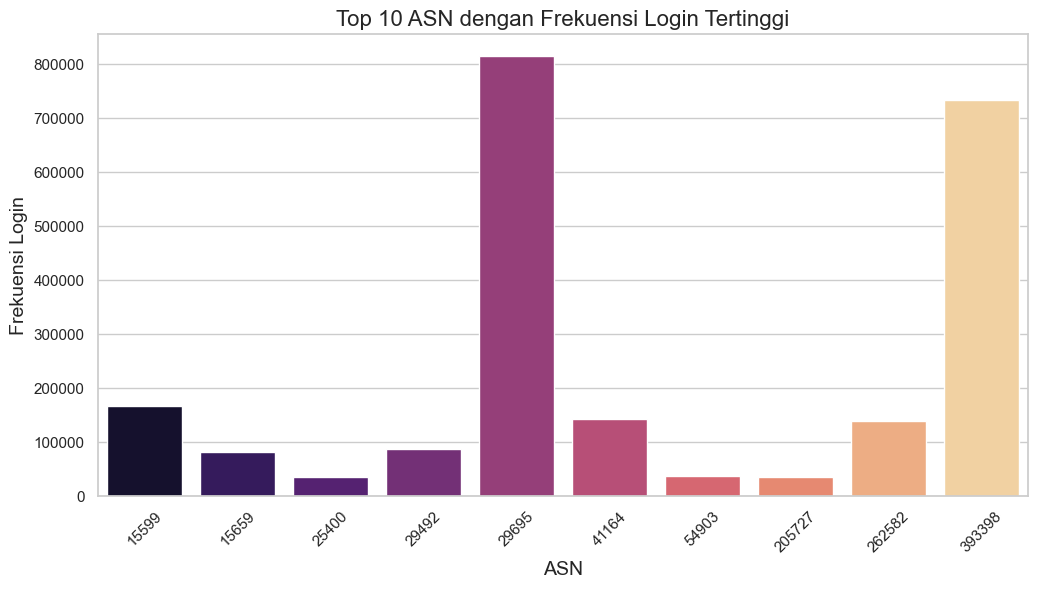

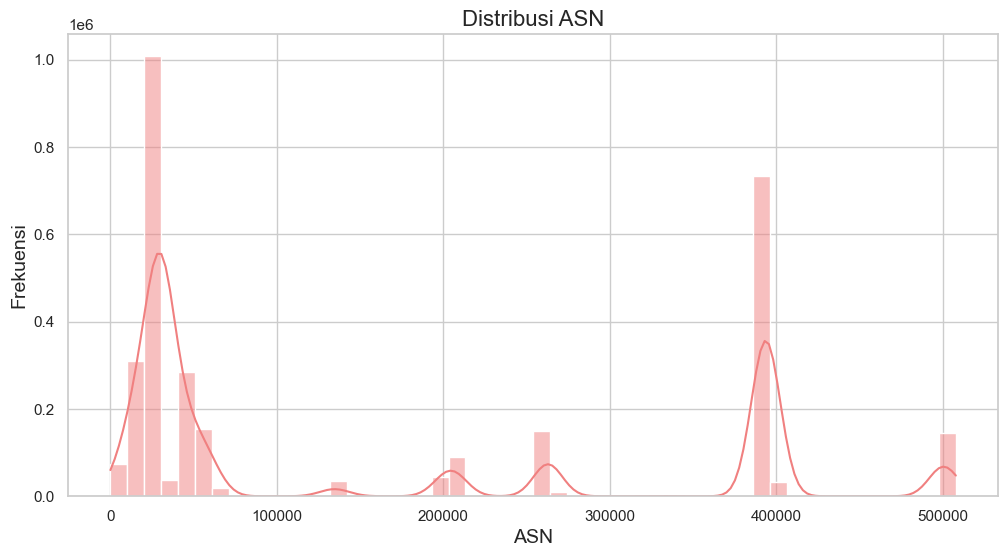

In [17]:
# Menghitung jumlah login per User ID
login_counts = df['User ID'].value_counts()

# Visualisasi Histogram dari jumlah login per User ID
plt.figure(figsize=(12, 6))
sns.histplot(login_counts, bins=50, kde=True, color='dodgerblue')
plt.title('Distribusi Jumlah Login per User ID', fontsize=16)
plt.xlabel('Jumlah Login', fontsize=14)
plt.ylabel('Jumlah User (Frekuensi)', fontsize=14)
plt.yscale('log')  # Menggunakan skala logaritmik untuk sumbu Y agar lebih mudah dibaca
plt.show()


# Visualisasi Distribusi Login Timestamp

# Pengantar narasi
print("Login Timestamp memiliki nilai unik yang sangat tinggi karena mencatat waktu spesifik setiap login. Untuk mendapatkan pemahaman yang lebih baik, data waktu dikonversi ke dalam jam dan hari. Visualisasi distribusi login per jam berikut menunjukkan kecenderungan waktu login pengguna.")

# Konversi Login Timestamp ke datetime
df['Login Timestamp'] = pd.to_datetime(df['Login Timestamp'])

# Ekstraksi jam dari Login Timestamp
df['Login Hour'] = df['Login Timestamp'].dt.hour

# Visualisasi Histogram login berdasarkan hour (jam 0–23)
plt.figure(figsize=(12, 6))
sns.histplot(df['Login Hour'], bins=24, kde=False, color='skyblue')
plt.title('Distribusi Login per Jam', fontsize=16)
plt.xlabel('Jam', fontsize=14)
plt.ylabel('Frekuensi Login', fontsize=14)
plt.xticks(range(0, 24))
plt.show()

# Ekstraksi hari dari Login Timestamp
df['Login Day'] = df['Login Timestamp'].dt.day_name()

# Visualisasi Bar chart frekuensi login per hari (Senin–Minggu)
plt.figure(figsize=(12, 6))
sns.countplot(x='Login Day', data=df, order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], palette='viridis')
plt.title('Frekuensi Login per Hari', fontsize=16)
plt.xlabel('Hari', fontsize=14)
plt.ylabel('Frekuensi Login', fontsize=14)
plt.xticks(rotation=45)
plt.show()

# Visualisasi Distribusi ASN

# Pengantar narasi
print("Fitur ASN menunjukkan variasi penyedia layanan internet yang digunakan oleh pengguna. Sebagian besar login berasal dari ASN tertentu secara signifikan lebih banyak dibandingkan yang lain, sebagaimana ditunjukkan pada visualisasi berikut.")

# Bar chart 10 ASN dengan frekuensi login tertinggi
top_asn = df['ASN'].value_counts().nlargest(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=top_asn.index, y=top_asn.values, palette='magma')
plt.title('Top 10 ASN dengan Frekuensi Login Tertinggi', fontsize=16)
plt.xlabel('ASN', fontsize=14)
plt.ylabel('Frekuensi Login', fontsize=14)
plt.xticks(rotation=45)
plt.show()

# Histogram distribusi ASN
plt.figure(figsize=(12, 6))
sns.histplot(df['ASN'], bins=50, kde=True, color='lightcoral')
plt.title('Distribusi ASN', fontsize=16)
plt.xlabel('ASN', fontsize=14)
plt.ylabel('Frekuensi', fontsize=14)
plt.show()




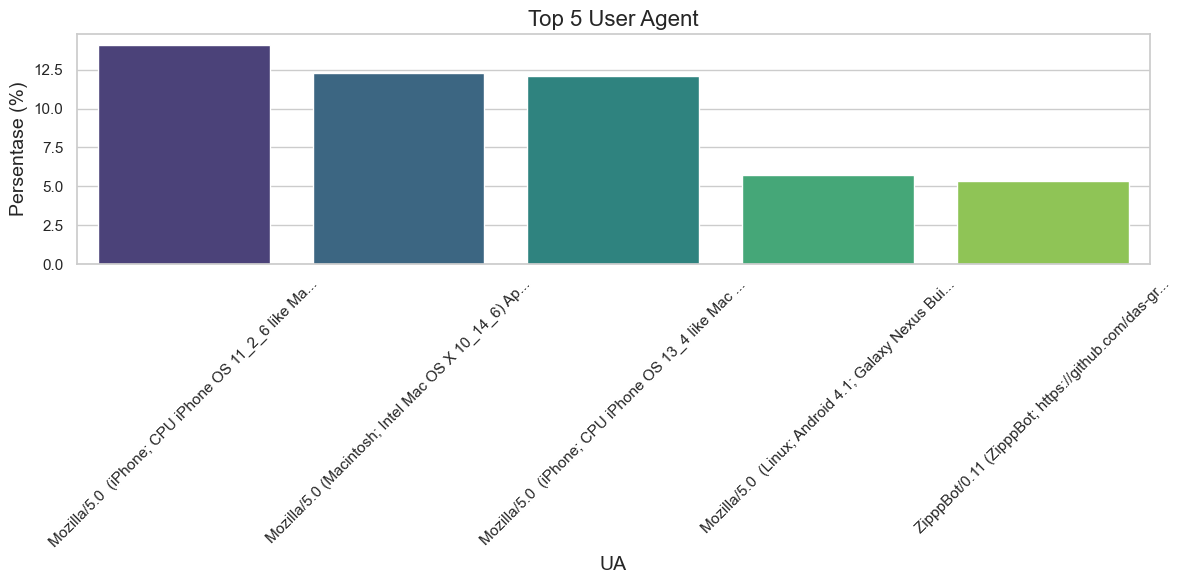

In [7]:
# Visualisasi Bar Chart untuk User Agent String dalam Persentase
plt.figure(figsize=(12, 6))

# Potong string UA panjang dan beri ellipsis
def truncate_ua(ua, max_len=50):
    return ua if len(ua) <= max_len else ua[:max_len] + '...'

# Memperpendek nama User Agent String
df['Short UA'] = df['User Agent String'].apply(truncate_ua)
ua_counts = df['Short UA'].value_counts(normalize=True).nlargest(5) * 100
sns.barplot(x=ua_counts.index, y=ua_counts.values, palette='viridis')
plt.title('Top 5 User Agent', fontsize=16)
plt.xlabel('UA', fontsize=14)
plt.ylabel('Persentase (%)', fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


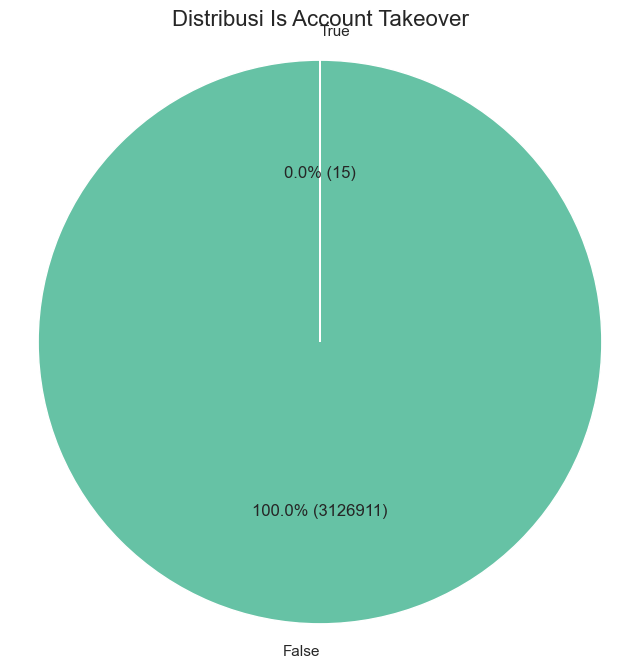

In [9]:
# Visualisasi ketidakseimbangan dengan pie chart untuk fitur 'Is Account Takeover'
takeover_counts = df['Is Account Takeover'].value_counts()
# Mengganti label 'True' dengan 'Benar' agar tidak tertutup
labels = ['True' if label == True else 'False' for label in takeover_counts.index]
# Menentukan posisi persentase di kanan dan kiri
def autopct_generator(values):
    def my_autopct(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return '{p:.1f}% ({v:d})'.format(p=pct,v=val)
    return my_autopct

# Membuat pie chart untuk menampilkan hasil
plt.figure(figsize=(8, 8))
plt.pie(takeover_counts, labels=labels, autopct=autopct_generator(takeover_counts), startangle=90, colors=['#66c2a5', '#fc8d62'])
plt.title('Distribusi Is Account Takeover', fontsize=16)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


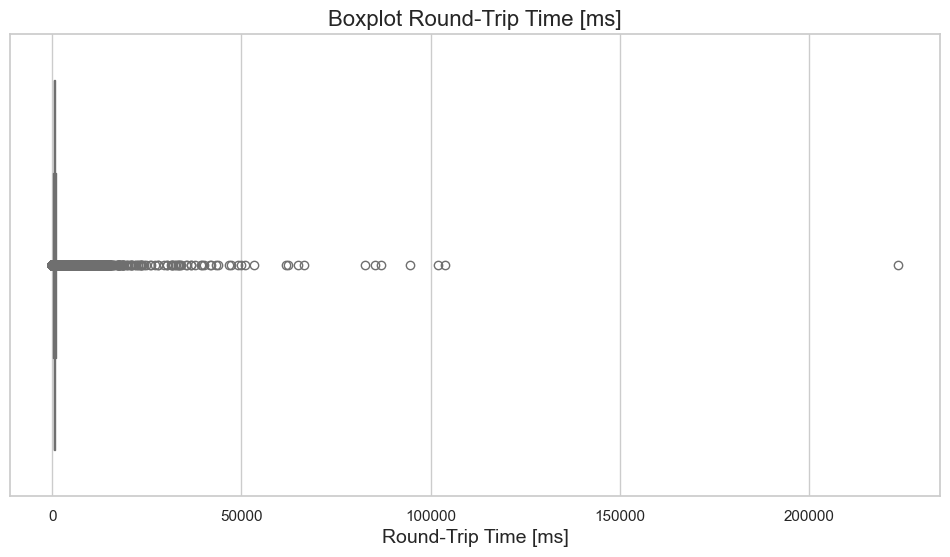

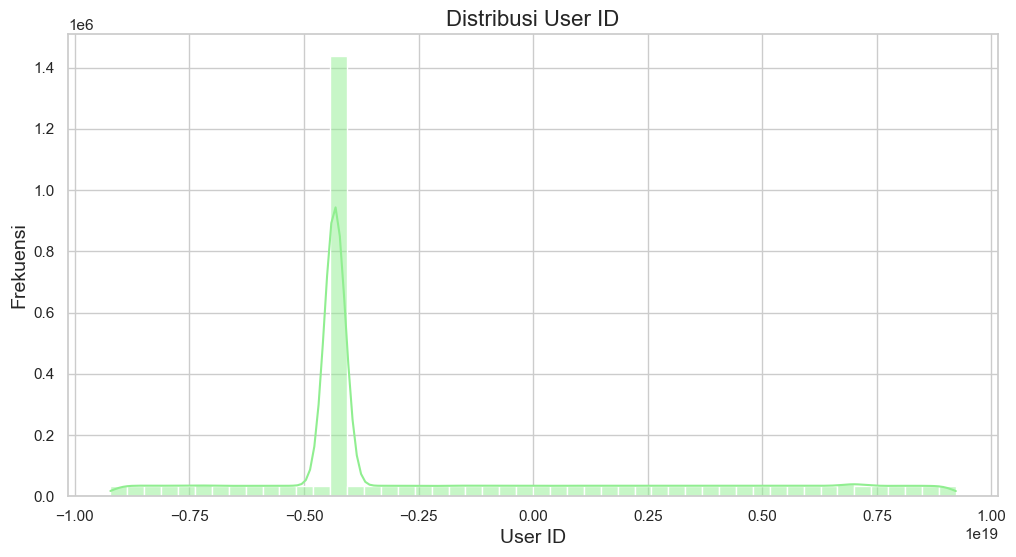

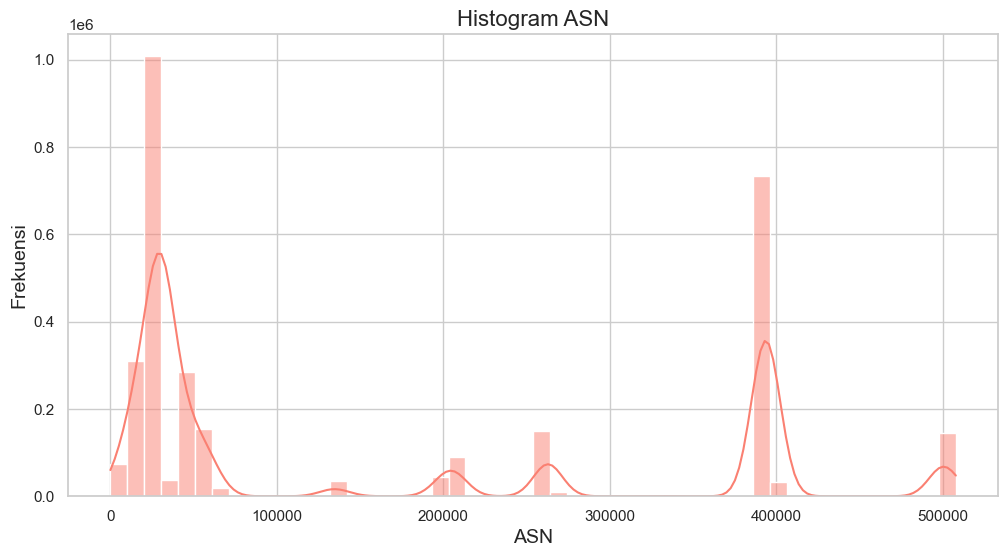

In [11]:

# Visualisasi Boxplot untuk Round-Trip Time [ms]
plt.figure(figsize=(12, 6))
sns.boxplot(x=df['Round-Trip Time [ms]'], color='skyblue')
plt.title('Boxplot Round-Trip Time [ms]', fontsize=16)
plt.xlabel('Round-Trip Time [ms]', fontsize=14)
plt.show()

# Visualisasi Distribusi User ID
plt.figure(figsize=(12, 6))
sns.histplot(df['User ID'], bins=50, kde=True, color='lightgreen')
plt.title('Distribusi User ID', fontsize=16)
plt.xlabel('User ID', fontsize=14)
plt.ylabel('Frekuensi', fontsize=14)
plt.show()

# Visualisasi Histogram untuk ASN
plt.figure(figsize=(12, 6))
sns.histplot(df['ASN'], bins=50, kde=True, color='salmon')
plt.title('Histogram ASN', fontsize=16)
plt.xlabel('ASN', fontsize=14)
plt.ylabel('Frekuensi', fontsize=14)
plt.show()

